In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300

# 텐서 씨드 고정
import tensorflow as tf
import random
import os
#글로벌 시드
class config:
    seed = 1234
    device = "cuda:0"    

def seed_everything(seed: int = 1234):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    tf.random.set_seed(seed)
    
seed_everything(config.seed)

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU
from tensorflow.keras.callbacks import EarlyStopping

seed =1234

pd.set_option('display.max_rows', 10, 'display.max_columns', 500, 'max_colwidth', None)

In [ ]:
# df = pd.read_csv('./kospi.csv')
df = pd.read_csv('./baseline_hv.csv')

df.shape

(4598, 55)

In [ ]:
df.head()

date  baseline   HV  HV_pred  HV_resid  sum_word        MA5  MA20  \
0  2003-07-28     100.0  NaN      0.0       NaN       0.0   0.000000   0.0   
1  2003-07-29     100.0  0.0      0.0       0.0       0.0   0.000000   0.0   
2  2003-07-30     100.0  0.0      0.0       0.0       0.0   0.000000   0.0   
3  2003-07-31     100.0  0.0      0.0       0.0       0.0   0.000000   0.0   
4  2003-08-01     100.0  0.0      0.0       0.0       3.0  41.088806   0.0   

   MA60  MA120  MA5_gra  MA20_gra  MA60_gra  MA120_gra         V_MA5  V_MA20  \
0   0.0    0.0      0.0       0.0       0.0        0.0  0.000000e+00     0.0   
1   0.0    0.0      0.0       0.0       0.0        0.0  0.000000e+00     0.0   
2   0.0    0.0      0.0       0.0       0.0        0.0  0.000000e+00     0.0   
3   0.0    0.0      0.0       0.0       0.0        0.0  0.000000e+00     0.0   
4   0.0    0.0      0.0       0.0       0.0        0.0  3.291079e+07     0.0   

   V_MA60  V_MA120       EMA5  EMA20  EMA60  EMA120  MACD  MACD_sig9  \
0     0.0      0.0   0.000000    0.0    0.0     0.0   0.0        0.0   
1     0.0      0.0   0.000000    0.0    0.0     0.0   0.0        0.0   
2     0.0      0.0   0.000000    0.0    0.0     0.0   0.0        0.0   
3     0.0      0.0   0.000000    0.0    0.0     0.0   0.0        0.0   
4     0.0      0.0  41.088806    0.0    0.0     0.0   0.0        0.0   

   MACD_OSC  Fast%K  Fast%D  Slow%K  Slow%D  RSI14  RSI signal  CCI  A_Ratio  \
0       0.0     0.0     0.0     0.0     0.0    0.0         0.0  0.0      0.0   
1       0.0     0.0     0.0     0.0     0.0    0.0         0.0  0.0      0.0   
2       0.0     0.0     0.0     0.0     0.0    0.0         0.0  0.0      0.0   
3       0.0     0.0     0.0     0.0     0.0    0.0         0.0  0.0      0.0   
4       0.0     0.0     0.0     0.0     0.0    0.0         0.0  0.0      0.0   

   B_Ratio  ATR  UpDI  DownDI  MFI  Momentum  Sonar  Sonar_sig5  STDEV  Sigma  \
0      0.0  0.0   0.0     0.0  0.0       0.0    0.0         0.0    0.0    0.0   
1      0.0  0.0   0.0     0.0  0.0       0.0    0.0         0.0    0.0    0.0   
2      0.0  0.0   0.0     0.0  0.0       0.0    0.0         0.0    0.0    0.0   
3      0.0  0.0   0.0     0.0  0.0       0.0    0.0         0.0    0.0    0.0   
4      0.0  0.0   0.0     0.0  0.0       0.0    0.0         0.0    0.0    0.0   

   TRIX   VR  WILLR     Psy  Disparity20  Disparity60  ADX  ADOSC  Volume_OSC  \
0   0.0  0.0    0.0   0.000          0.0          0.0  0.0    0.0         0.0   
1   0.0  0.0    0.0   2.750          0.0          0.0  0.0    0.0         0.0   
2   0.0  0.0    0.0   3.125          0.0          0.0  0.0    0.0         0.0   
3   0.0  0.0    0.0  10.625          0.0          0.0  0.0    0.0         0.0   
4   0.0  0.0    0.0  13.125          0.0          0.0  0.0    0.0         0.0   

   upperband  middleband  lowerband  
0        0.0         0.0        0.0  
1        0.0         0.0        0.0  
2        0.0         0.0        0.0  
3        0.0         0.0        0.0  
4        0.0         0.0        0.0

In [ ]:
df.isna().sum()

date           0
baseline       0
HV             1
HV_pred       20
HV_resid      21
              ..
ADOSC          0
Volume_OSC     0
upperband      0
middleband     0
lowerband      0
Length: 55, dtype: int64

In [ ]:
df.head()

date  baseline   HV  HV_pred  HV_resid  sum_word        MA5  MA20  \
0  2003-07-28     100.0  NaN      0.0       NaN       0.0   0.000000   0.0   
1  2003-07-29     100.0  0.0      0.0       0.0       0.0   0.000000   0.0   
2  2003-07-30     100.0  0.0      0.0       0.0       0.0   0.000000   0.0   
3  2003-07-31     100.0  0.0      0.0       0.0       0.0   0.000000   0.0   
4  2003-08-01     100.0  0.0      0.0       0.0       3.0  41.088806   0.0   

   MA60  MA120  MA5_gra  MA20_gra  MA60_gra  MA120_gra         V_MA5  V_MA20  \
0   0.0    0.0      0.0       0.0       0.0        0.0  0.000000e+00     0.0   
1   0.0    0.0      0.0       0.0       0.0        0.0  0.000000e+00     0.0   
2   0.0    0.0      0.0       0.0       0.0        0.0  0.000000e+00     0.0   
3   0.0    0.0      0.0       0.0       0.0        0.0  0.000000e+00     0.0   
4   0.0    0.0      0.0       0.0       0.0        0.0  3.291079e+07     0.0   

   V_MA60  V_MA120       EMA5  EMA20  EMA60  EMA120  MACD  MACD_sig9  \
0     0.0      0.0   0.000000    0.0    0.0     0.0   0.0        0.0   
1     0.0      0.0   0.000000    0.0    0.0     0.0   0.0        0.0   
2     0.0      0.0   0.000000    0.0    0.0     0.0   0.0        0.0   
3     0.0      0.0   0.000000    0.0    0.0     0.0   0.0        0.0   
4     0.0      0.0  41.088806    0.0    0.0     0.0   0.0        0.0   

   MACD_OSC  Fast%K  Fast%D  Slow%K  Slow%D  RSI14  RSI signal  CCI  A_Ratio  \
0       0.0     0.0     0.0     0.0     0.0    0.0         0.0  0.0      0.0   
1       0.0     0.0     0.0     0.0     0.0    0.0         0.0  0.0      0.0   
2       0.0     0.0     0.0     0.0     0.0    0.0         0.0  0.0      0.0   
3       0.0     0.0     0.0     0.0     0.0    0.0         0.0  0.0      0.0   
4       0.0     0.0     0.0     0.0     0.0    0.0         0.0  0.0      0.0   

   B_Ratio  ATR  UpDI  DownDI  MFI  Momentum  Sonar  Sonar_sig5  STDEV  Sigma  \
0      0.0  0.0   0.0     0.0  0.0       0.0    0.0         0.0    0.0    0.0   
1      0.0  0.0   0.0     0.0  0.0       0.0    0.0         0.0    0.0    0.0   
2      0.0  0.0   0.0     0.0  0.0       0.0    0.0         0.0    0.0    0.0   
3      0.0  0.0   0.0     0.0  0.0       0.0    0.0         0.0    0.0    0.0   
4      0.0  0.0   0.0     0.0  0.0       0.0    0.0         0.0    0.0    0.0   

   TRIX   VR  WILLR     Psy  Disparity20  Disparity60  ADX  ADOSC  Volume_OSC  \
0   0.0  0.0    0.0   0.000          0.0          0.0  0.0    0.0         0.0   
1   0.0  0.0    0.0   2.750          0.0          0.0  0.0    0.0         0.0   
2   0.0  0.0    0.0   3.125          0.0          0.0  0.0    0.0         0.0   
3   0.0  0.0    0.0  10.625          0.0          0.0  0.0    0.0         0.0   
4   0.0  0.0    0.0  13.125          0.0          0.0  0.0    0.0         0.0   

   upperband  middleband  lowerband  
0        0.0         0.0        0.0  
1        0.0         0.0        0.0  
2        0.0         0.0        0.0  
3        0.0         0.0        0.0  
4        0.0         0.0        0.0

In [ ]:
df['sum_word'].fillna(0, inplace=True)
df['sum_word'].isnull().sum()

0

In [ ]:
df.set_index('date', inplace=True)

In [ ]:
df.head()

baseline   HV  HV_pred  HV_resid  sum_word        MA5  MA20  MA60  \
date                                                                            
2003-07-28     100.0  NaN      0.0       NaN       0.0   0.000000   0.0   0.0   
2003-07-29     100.0  0.0      0.0       0.0       0.0   0.000000   0.0   0.0   
2003-07-30     100.0  0.0      0.0       0.0       0.0   0.000000   0.0   0.0   
2003-07-31     100.0  0.0      0.0       0.0       0.0   0.000000   0.0   0.0   
2003-08-01     100.0  0.0      0.0       0.0       3.0  41.088806   0.0   0.0   

            MA120  MA5_gra  MA20_gra  MA60_gra  MA120_gra         V_MA5  \
date                                                                      
2003-07-28    0.0      0.0       0.0       0.0        0.0  0.000000e+00   
2003-07-29    0.0      0.0       0.0       0.0        0.0  0.000000e+00   
2003-07-30    0.0      0.0       0.0       0.0        0.0  0.000000e+00   
2003-07-31    0.0      0.0       0.0       0.0        0.0  0.000000e+00   
2003-08-01    0.0      0.0       0.0       0.0        0.0  3.291079e+07   

            V_MA20  V_MA60  V_MA120       EMA5  EMA20  EMA60  EMA120  MACD  \
date                                                                         
2003-07-28     0.0     0.0      0.0   0.000000    0.0    0.0     0.0   0.0   
2003-07-29     0.0     0.0      0.0   0.000000    0.0    0.0     0.0   0.0   
2003-07-30     0.0     0.0      0.0   0.000000    0.0    0.0     0.0   0.0   
2003-07-31     0.0     0.0      0.0   0.000000    0.0    0.0     0.0   0.0   
2003-08-01     0.0     0.0      0.0  41.088806    0.0    0.0     0.0   0.0   

            MACD_sig9  MACD_OSC  Fast%K  Fast%D  Slow%K  Slow%D  RSI14  \
date                                                                     
2003-07-28        0.0       0.0     0.0     0.0     0.0     0.0    0.0   
2003-07-29        0.0       0.0     0.0     0.0     0.0     0.0    0.0   
2003-07-30        0.0       0.0     0.0     0.0     0.0     0.0    0.0   
2003-07-31        0.0       0.0     0.0     0.0     0.0     0.0    0.0   
2003-08-01        0.0       0.0     0.0     0.0     0.0     0.0    0.0   

            RSI signal  CCI  A_Ratio  B_Ratio  ATR  UpDI  DownDI  MFI  \
date                                                                    
2003-07-28         0.0  0.0      0.0      0.0  0.0   0.0     0.0  0.0   
2003-07-29         0.0  0.0      0.0      0.0  0.0   0.0     0.0  0.0   
2003-07-30         0.0  0.0      0.0      0.0  0.0   0.0     0.0  0.0   
2003-07-31         0.0  0.0      0.0      0.0  0.0   0.0     0.0  0.0   
2003-08-01         0.0  0.0      0.0      0.0  0.0   0.0     0.0  0.0   

            Momentum  Sonar  Sonar_sig5  STDEV  Sigma  TRIX   VR  WILLR  \
date                                                                      
2003-07-28       0.0    0.0         0.0    0.0    0.0   0.0  0.0    0.0   
2003-07-29       0.0    0.0         0.0    0.0    0.0   0.0  0.0    0.0   
2003-07-30       0.0    0.0         0.0    0.0    0.0   0.0  0.0    0.0   
2003-07-31       0.0    0.0         0.0    0.0    0.0   0.0  0.0    0.0   
2003-08-01       0.0    0.0         0.0    0.0    0.0   0.0  0.0    0.0   

               Psy  Disparity20  Disparity60  ADX  ADOSC  Volume_OSC  \
date                                                                   
2003-07-28   0.000          0.0          0.0  0.0    0.0         0.0   
2003-07-29   2.750          0.0          0.0  0.0    0.0         0.0   
2003-07-30   3.125          0.0          0.0  0.0    0.0         0.0   
2003-07-31  10.625          0.0          0.0  0.0    0.0         0.0   
2003-08-01  13.125          0.0          0.0  0.0    0.0         0.0   

            upperband  middleband  lowerband  
date                                          
2003-07-28        0.0         0.0        0.0  
2003-07-29        0.0         0.0        0.0  
2003-07-30        0.0         0.0        0.0  
2003-07-31        0.0         0.0        0.0  
2003-08-01        0.0      

In [ ]:
df.shape

(4598, 54)

In [ ]:
cols = ['HV', 'sum_word','MA5_gra','Volume_OSC','Sigma','Disparity20']#, 'MACD_OSC', 'Sonar', 'Sigma', 'Momentum', 'Volume_OSC',  'ATR','RSI signal','RSI14',  'ADOSC']
cols


['HV', 'sum_word', 'MA5_gra', 'Volume_OSC', 'Sigma', 'Disparity20']

In [ ]:
df = df[cols]

In [ ]:
df.index

Index(['2003-07-28', '2003-07-29', '2003-07-30', '2003-07-31', '2003-08-01',
       '2003-08-04', '2003-08-05', '2003-08-06', '2003-08-07', '2003-08-08',
       ...
       '2021-10-15', '2021-10-18', '2021-10-19', '2021-10-20', '2021-10-21',
       '2021-10-22', '2021-10-25', '2021-10-26', '2021-10-27', '2021-10-28'],
      dtype='object', name='date', length=4598)

In [ ]:
df.head()

HV  sum_word  MA5_gra  Volume_OSC  Sigma  Disparity20
date                                                              
2003-07-28  NaN       0.0      0.0         0.0    0.0          0.0
2003-07-29  0.0       0.0      0.0         0.0    0.0          0.0
2003-07-30  0.0       0.0      0.0         0.0    0.0          0.0
2003-07-31  0.0       0.0      0.0         0.0    0.0          0.0
2003-08-01  0.0       3.0      0.0         0.0    0.0          0.0

In [ ]:
df.shape

(4598, 6)

In [ ]:
feature_df = df.loc['2003-09-29':'2021-09-28', 'HV':'Disparity20']
print(feature_df.shape)
feature_df.head()

(4532, 6)


HV  sum_word   MA5_gra  Volume_OSC     Sigma  Disparity20
date                                                                       
2003-09-29  0.000000       0.0 -0.003142    0.484744 -1.225259    97.591753
2003-09-30  0.046147       0.0 -0.007730    4.466314 -1.742624    96.506024
2003-10-01  0.111621       0.0  0.002179    8.823151 -0.226977    99.353199
2003-10-02  0.113955       0.0  0.005389    8.880720  0.099223   100.166147
2003-10-03  0.127419       0.0  0.009944    9.854309  0.955635   101.891182

In [ ]:
label_df = df.loc['2003-09-29':'2021-09-28', 'HV']
print(label_df.shape)
label_df.head()

(4532,)


date
2003-09-29    0.000000
2003-09-30    0.046147
2003-10-01    0.111621
2003-10-02    0.113955
2003-10-03    0.127419
Name: HV, dtype: float64

# TRAIN, TEST 분리


## 1차 train_test 분리

In [ ]:
X_train_1st = feature_df.loc['2003-09-29':'2011-09-28']
print(X_train_1st.shape)
X_train_1st.head()

(2016, 6)


HV  sum_word   MA5_gra  Volume_OSC     Sigma  Disparity20
date                                                                       
2003-09-29  0.000000       0.0 -0.003142    0.484744 -1.225259    97.591753
2003-09-30  0.046147       0.0 -0.007730    4.466314 -1.742624    96.506024
2003-10-01  0.111621       0.0  0.002179    8.823151 -0.226977    99.353199
2003-10-02  0.113955       0.0  0.005389    8.880720  0.099223   100.166147
2003-10-03  0.127419       0.0  0.009944    9.854309  0.955635   101.891182

In [ ]:
y_train_1st = label_df.loc['2003-09-29':'2011-09-28']
print(y_train_1st.shape)
y_train_1st.head()

(2016,)


date
2003-09-29    0.000000
2003-09-30    0.046147
2003-10-01    0.111621
2003-10-02    0.113955
2003-10-03    0.127419
Name: HV, dtype: float64

### test

In [ ]:
X_test_1st = feature_df.loc['2011-09-29':'2021-10-28']
print(X_test_1st.shape)
X_test_1st.head()

(2516, 6)


HV  sum_word   MA5_gra  Volume_OSC     Sigma  Disparity20
date                                                                       
2011-09-29  0.311156      24.0  0.007127    7.613165 -0.607309    97.759248
2011-09-30  0.324805      12.0 -0.001436    6.637214 -1.508087    95.174749
2011-10-03  0.327470      10.5 -0.010362    7.614666 -2.099935    92.930028
2011-10-04  0.340938      42.0 -0.010086   13.034524 -1.284014    95.421343
2011-10-05  0.327492      21.0 -0.002000   12.029998 -0.667012    97.453557

In [ ]:
y_test_1st = label_df.loc['2011-09-29':'2021-10-28']
print(y_test_1st.shape)
y_test_1st.head()

(2516,)


date
2011-09-29    0.311156
2011-09-30    0.324805
2011-10-03    0.327470
2011-10-04    0.340938
2011-10-05    0.327492
Name: HV, dtype: float64

In [ ]:
print(X_train_1st.shape, y_train_1st.shape)
print(X_test_1st.shape, y_test_1st.shape)

(2016, 6) (2016,)
(2516, 6) (2516,)


## scaling
X와 y를 각각 scaling 해주어야한다.

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Standardization 평균 0 / 분산 1
X_scaler = MinMaxScaler()

# 교차검증시
X_scaler.fit(X_train_1st)
X_train_1st_sc = X_scaler.transform(X_train_1st)
X_test_1st_sc = X_scaler.transform(X_test_1st)

In [ ]:
# from sklearn.preprocessing import StandardScaler

# Standardization 평균 0 / 분산 1
y_scaler = MinMaxScaler()   

# 교차검증시
y_scaler.fit(np.array(y_train_1st).reshape(-1,1))
y_train_1st_sc = y_scaler.transform(np.array(y_train_1st).reshape(-1,1))
y_test_1st_sc = y_scaler.transform(np.array(y_test_1st).reshape(-1,1))

In [ ]:
X_train_1st_sc.shape, X_test_1st_sc.shape, y_train_1st.shape, y_test_1st.shape

((2016, 6), (2516, 6), (2016,), (2516,))

In [ ]:
y_train_1st_sc[:5]

array([[0.        ],
       [0.04309432],
       [0.1042375 ],
       [0.10641735],
       [0.11899137]])

In [ ]:
y_test_1st_sc[:5]

array([[0.29057482],
       [0.30332099],
       [0.30580974],
       [0.31838696],
       [0.30583013]])

In [ ]:
y_train_1st[:5]

date
2003-09-29    0.000000
2003-09-30    0.046147
2003-10-01    0.111621
2003-10-02    0.113955
2003-10-03    0.127419
Name: HV, dtype: float64

In [ ]:
y_test_1st[:5]

date
2011-09-29    0.311156
2011-09-30    0.324805
2011-10-03    0.327470
2011-10-04    0.340938
2011-10-05    0.327492
Name: HV, dtype: float64

In [ ]:
# 입력 파라미터 feature, label -> numpy type
def make_sequence_dataset(feature, label, window_size):
    feature_list = [] # 생성될 feature list
    label_list = []  # 생성될 label list
    
    for i in range(len(feature)-window_size):
        feature_list.append(feature[i:i+window_size])
        label_list.append(label[i+window_size])
    return np.array(feature_list), np.array(label_list) # 3차원으로 만들어줌

In [ ]:
window_size = 20
X_train_1st, y_train_1st = make_sequence_dataset(X_train_1st_sc, y_train_1st_sc, window_size)
X_test_1st, y_test_1st = make_sequence_dataset(X_test_1st_sc, y_test_1st_sc, window_size)
print(X_train_1st.shape, y_train_1st.shape, X_test_1st.shape, y_test_1st.shape) # (batch size, time steps, input dims)

(1996, 20, 6) (1996, 1) (2496, 20, 6) (2496, 1)


# TRAIN, TEST 분리

In [ ]:
# input_shape
X_train_1st[0].shape

(20, 6)

# Model

In [ ]:
# Initialising the RNN
model_118 = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model_118.add(LSTM(units = 80, activation = 'LeakyReLU', return_sequences = True, input_shape = X_train_1st[0].shape))
# model_118.add(Dropout(0.1))

# Adding a second LSTM layer and some Dropout regularisation
# model_118.add(LSTM(units = 80, activation = 'LeakyReLU', return_sequences = True))
# model_118.add(Dropout(0.1))

# Adding a third LSTM layer and some Dropout regularisation
# model_118.add(LSTM(units = 32, activation = 'LeakyReLU', return_sequences = True))
# model_118.add(Dropout(0.1))

# Adding a fourth LSTM layer and some Dropout regularisation
model_118.add(LSTM(units = 80, activation = 'LeakyReLU'))
# model_118.add(Dropout(0.1))

# Adding the output layer
model_118.add(Dense(units = 1))
model_118.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 80)            27840     
_________________________________________________________________
lstm_1 (LSTM)                (None, 80)                51520     
_________________________________________________________________
dense (Dense)                (None, 1)                 81        
Total params: 79,441
Trainable params: 79,441
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

# 출처: https://kibua20.tistory.com/206 [모바일 SW 개발자가 운영하는 블로그]
# sgd = optimizers.SGD(learning_rate = 0.0001)
# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_118.compile(loss = 'mse', optimizer = 'adam')
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10)
history = model_118.fit(X_train_1st, y_train_1st, validation_data = (X_test_1st, y_test_1st), epochs=50, 
          batch_size=15, callbacks = [early_stop])

Epoch 1/50
134/134 [==============================] - 17s 80ms/step - loss: 0.0036 - val_loss: 0.0017
Epoch 2/50
134/134 [==============================] - 12s 89ms/step - loss: 9.4673e-04 - val_loss: 0.0045
Epoch 3/50
134/134 [==============================] - 9s 66ms/step - loss: 9.0644e-04 - val_loss: 7.9528e-04
Epoch 4/50
134/134 [==============================] - 8s 62ms/step - loss: 7.7085e-04 - val_loss: 0.0013
Epoch 5/50
134/134 [==============================] - 8s 62ms/step - loss: 7.6064e-04 - val_loss: 6.2382e-04
Epoch 6/50
134/134 [==============================] - 8s 63ms/step - loss: 5.5468e-04 - val_loss: 4.9216e-04
Epoch 7/50
134/134 [==============================] - 9s 68ms/step - loss: 5.2174e-04 - val_loss: 5.0649e-04
Epoch 8/50
134/134 [==============================] - 10s 71ms/step - loss: 4.8986e-04 - val_loss: 5.7108e-04
Epoch 9/50
134/134 [==============================] - 8s 63ms/step - loss: 4.9214e-04 - val_loss: 4.6902e-04
Epoch 10/50
134/134 [===========

In [ ]:
val_loss = history.history['val_loss']
print(val_loss[:5])

[0.001743086613714695, 0.004547193180769682, 0.0007952825399115682, 0.0012544197961688042, 0.0006238227942958474]


In [ ]:
train_loss = history.history['loss']
print(train_loss[:5])

[0.003616971429437399, 0.0009467289783060551, 0.0009064385667443275, 0.0007708537159487605, 0.0007606438011862338]


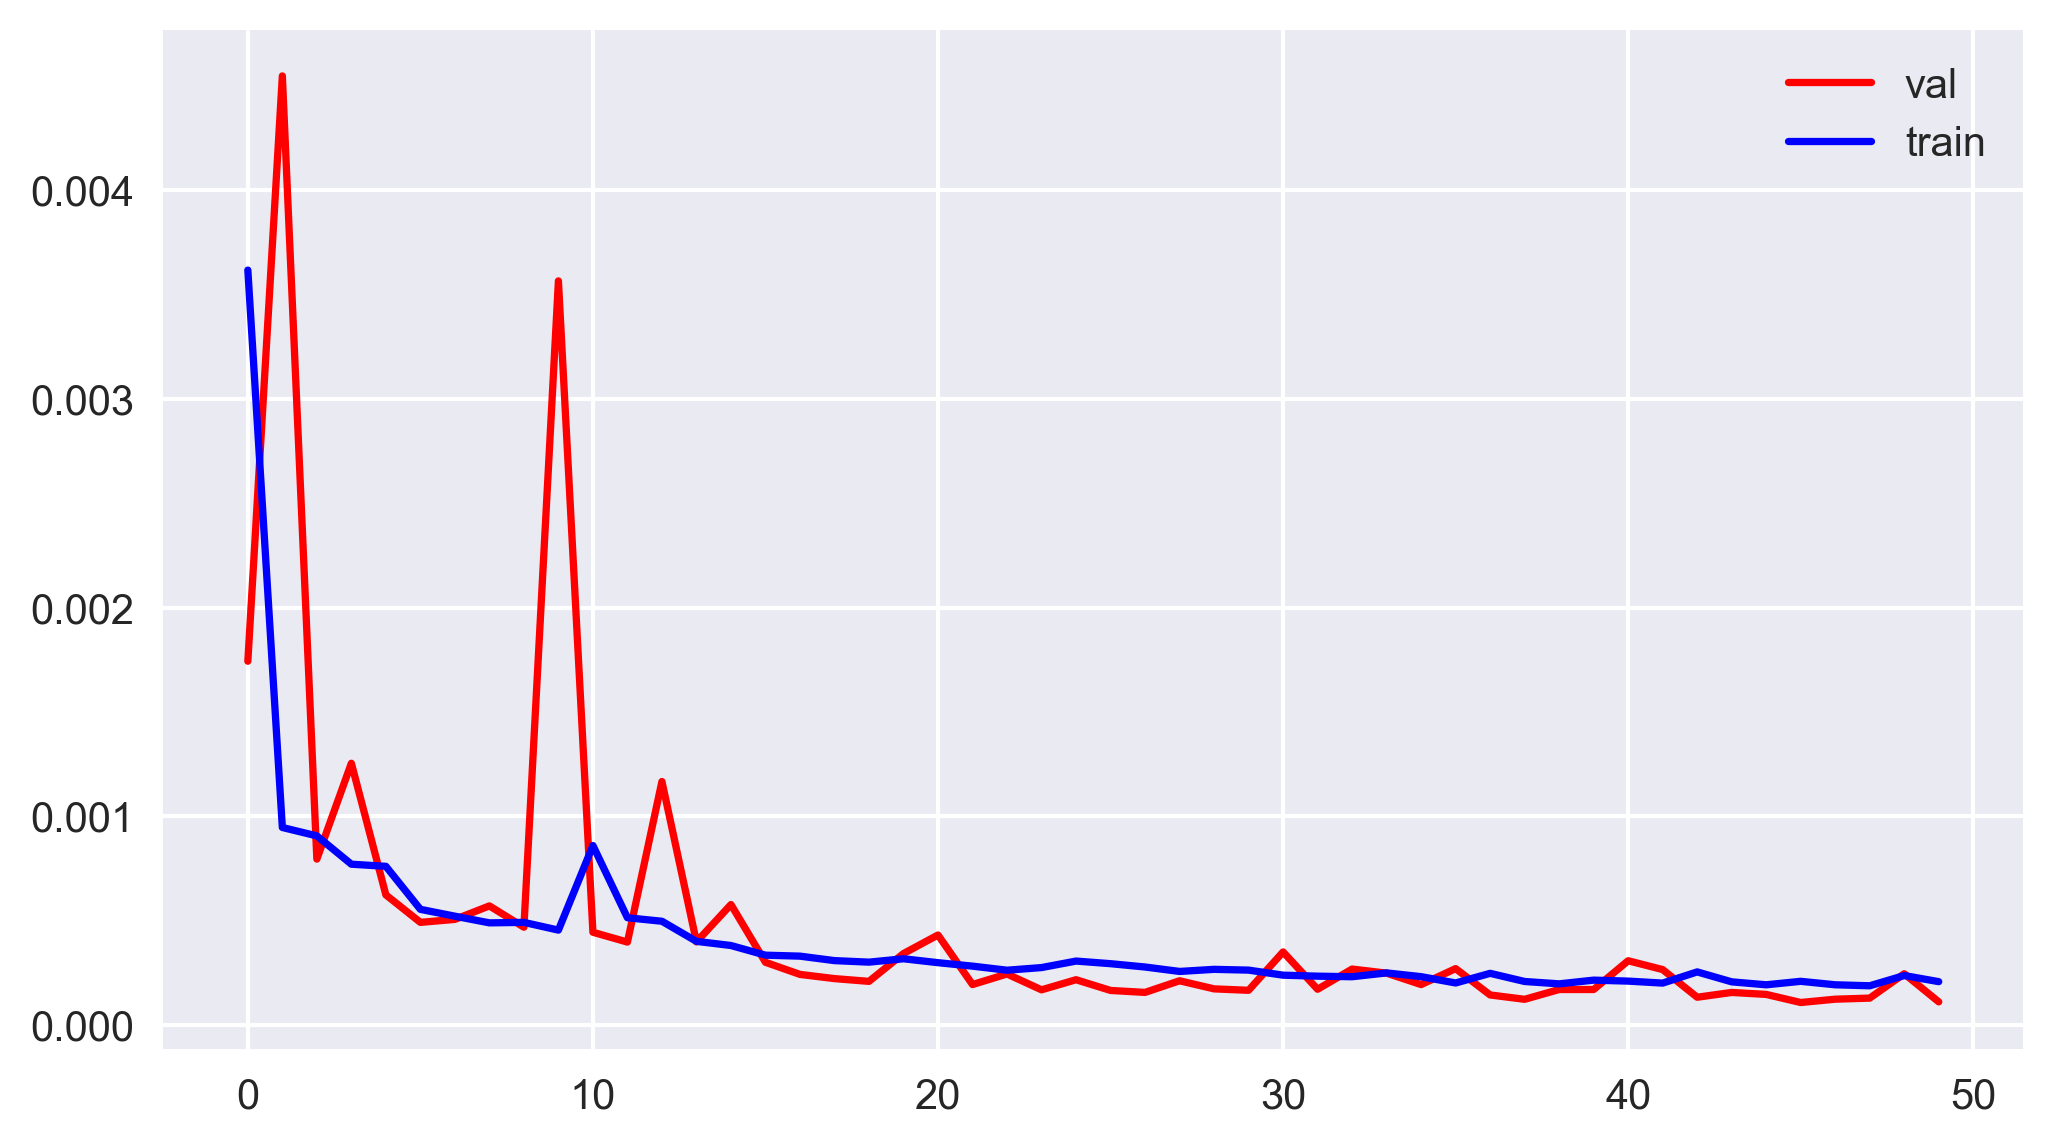

In [ ]:
plt.plot(np.arange(len(val_loss)), val_loss, c="red", label='val')
plt.plot(np.arange(len(train_loss)), train_loss, c='blue', label ='train')
plt.legend()
plt.show()

In [ ]:
rmse_score = np.sqrt(np.min(val_loss))
rmse_score

0.010406477010830292

# 예측 결과 시각화
- https://www.youtube.com/watch?v=LLLVYkXJw30

In [ ]:
pred = model_118.predict(X_test_1st)

In [ ]:
pred[:5]

array([[0.26731634],
       [0.28593957],
       [0.2718538 ],
       [0.2769821 ],
       [0.2873276 ]], dtype=float32)

In [ ]:
np.mean(pred)

0.13296472

In [ ]:
y_test_1st[:5]

array([[0.3077117 ],
       [0.28268843],
       [0.28485148],
       [0.29732126],
       [0.2969859 ]])

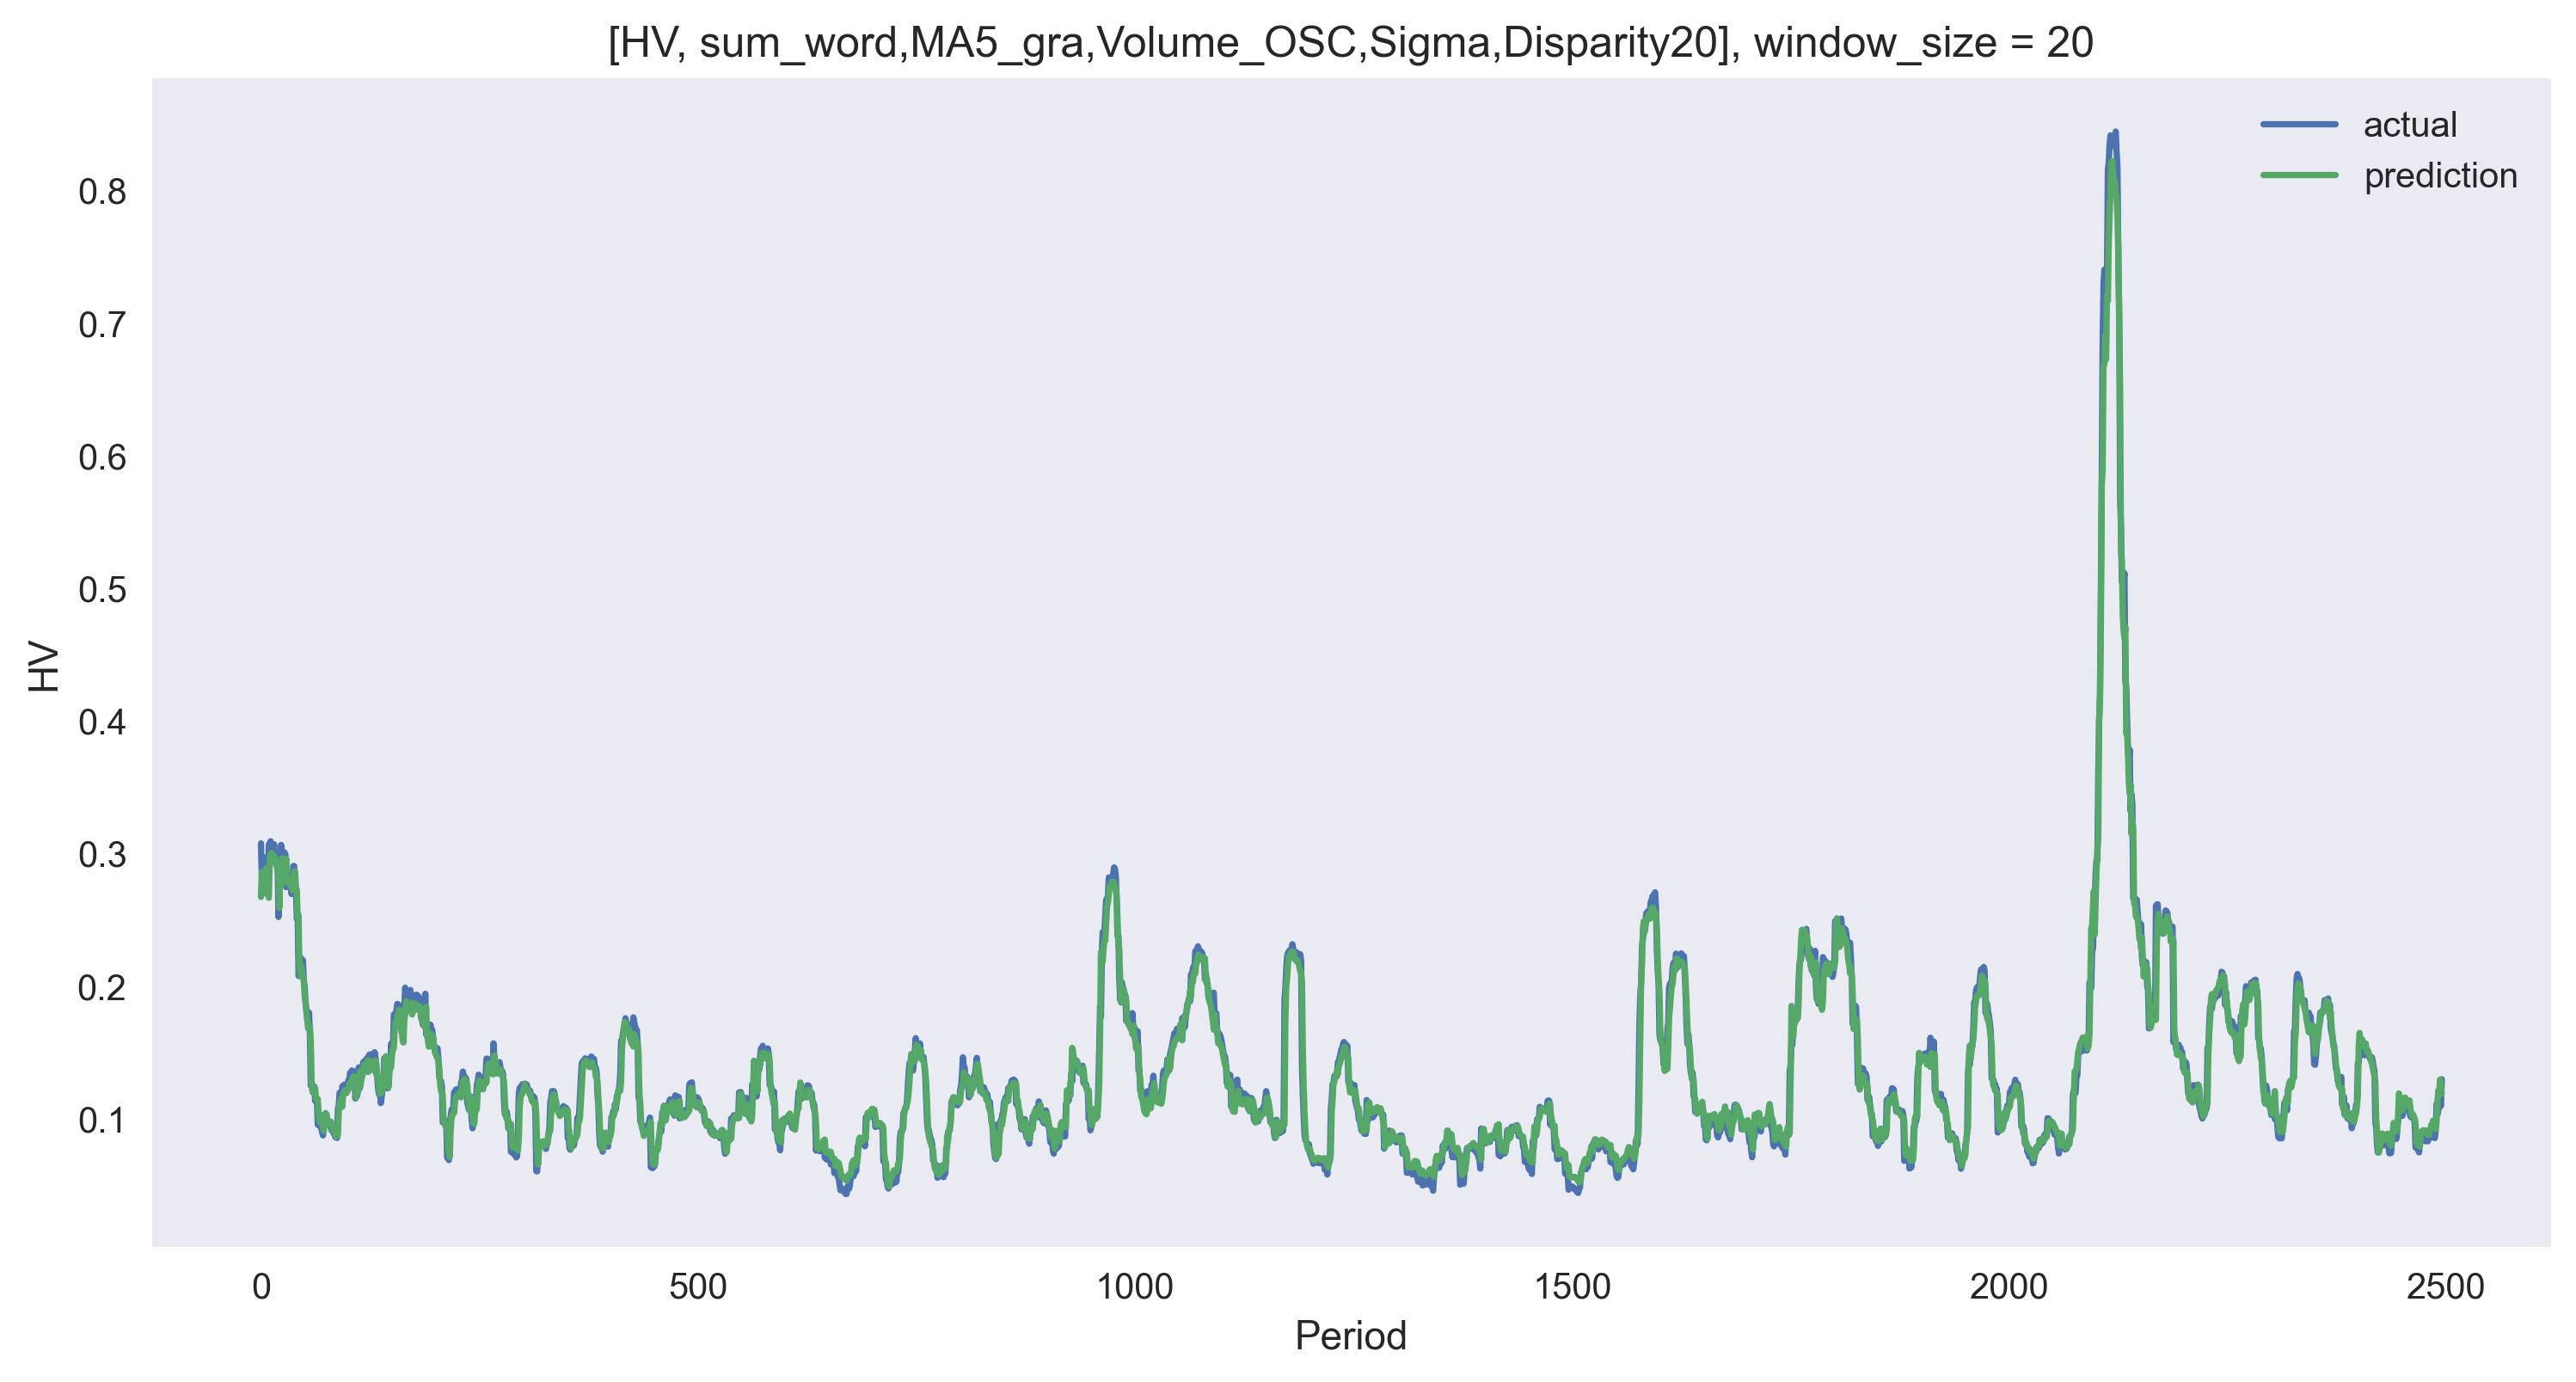

In [ ]:
plt.figure(figsize = (12,6))
plt.title('[HV, sum_word,MA5_gra,Volume_OSC,Sigma,Disparity20], window_size = 20')
plt.ylabel('HV')
plt.xlabel('Period')
plt.plot(y_test_1st, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.grid()
plt.legend(loc = 'best')

plt.show()

# 2020. 9. 29. ~ 2021. 9. 28.

In [ ]:
pred_2020 = pred[-252:]
pred_2020[:5]

array([[0.20617846],
       [0.2084669 ],
       [0.20445147],
       [0.2022953 ],
       [0.18651818]], dtype=float32)

In [ ]:
len(pred_2020)

252

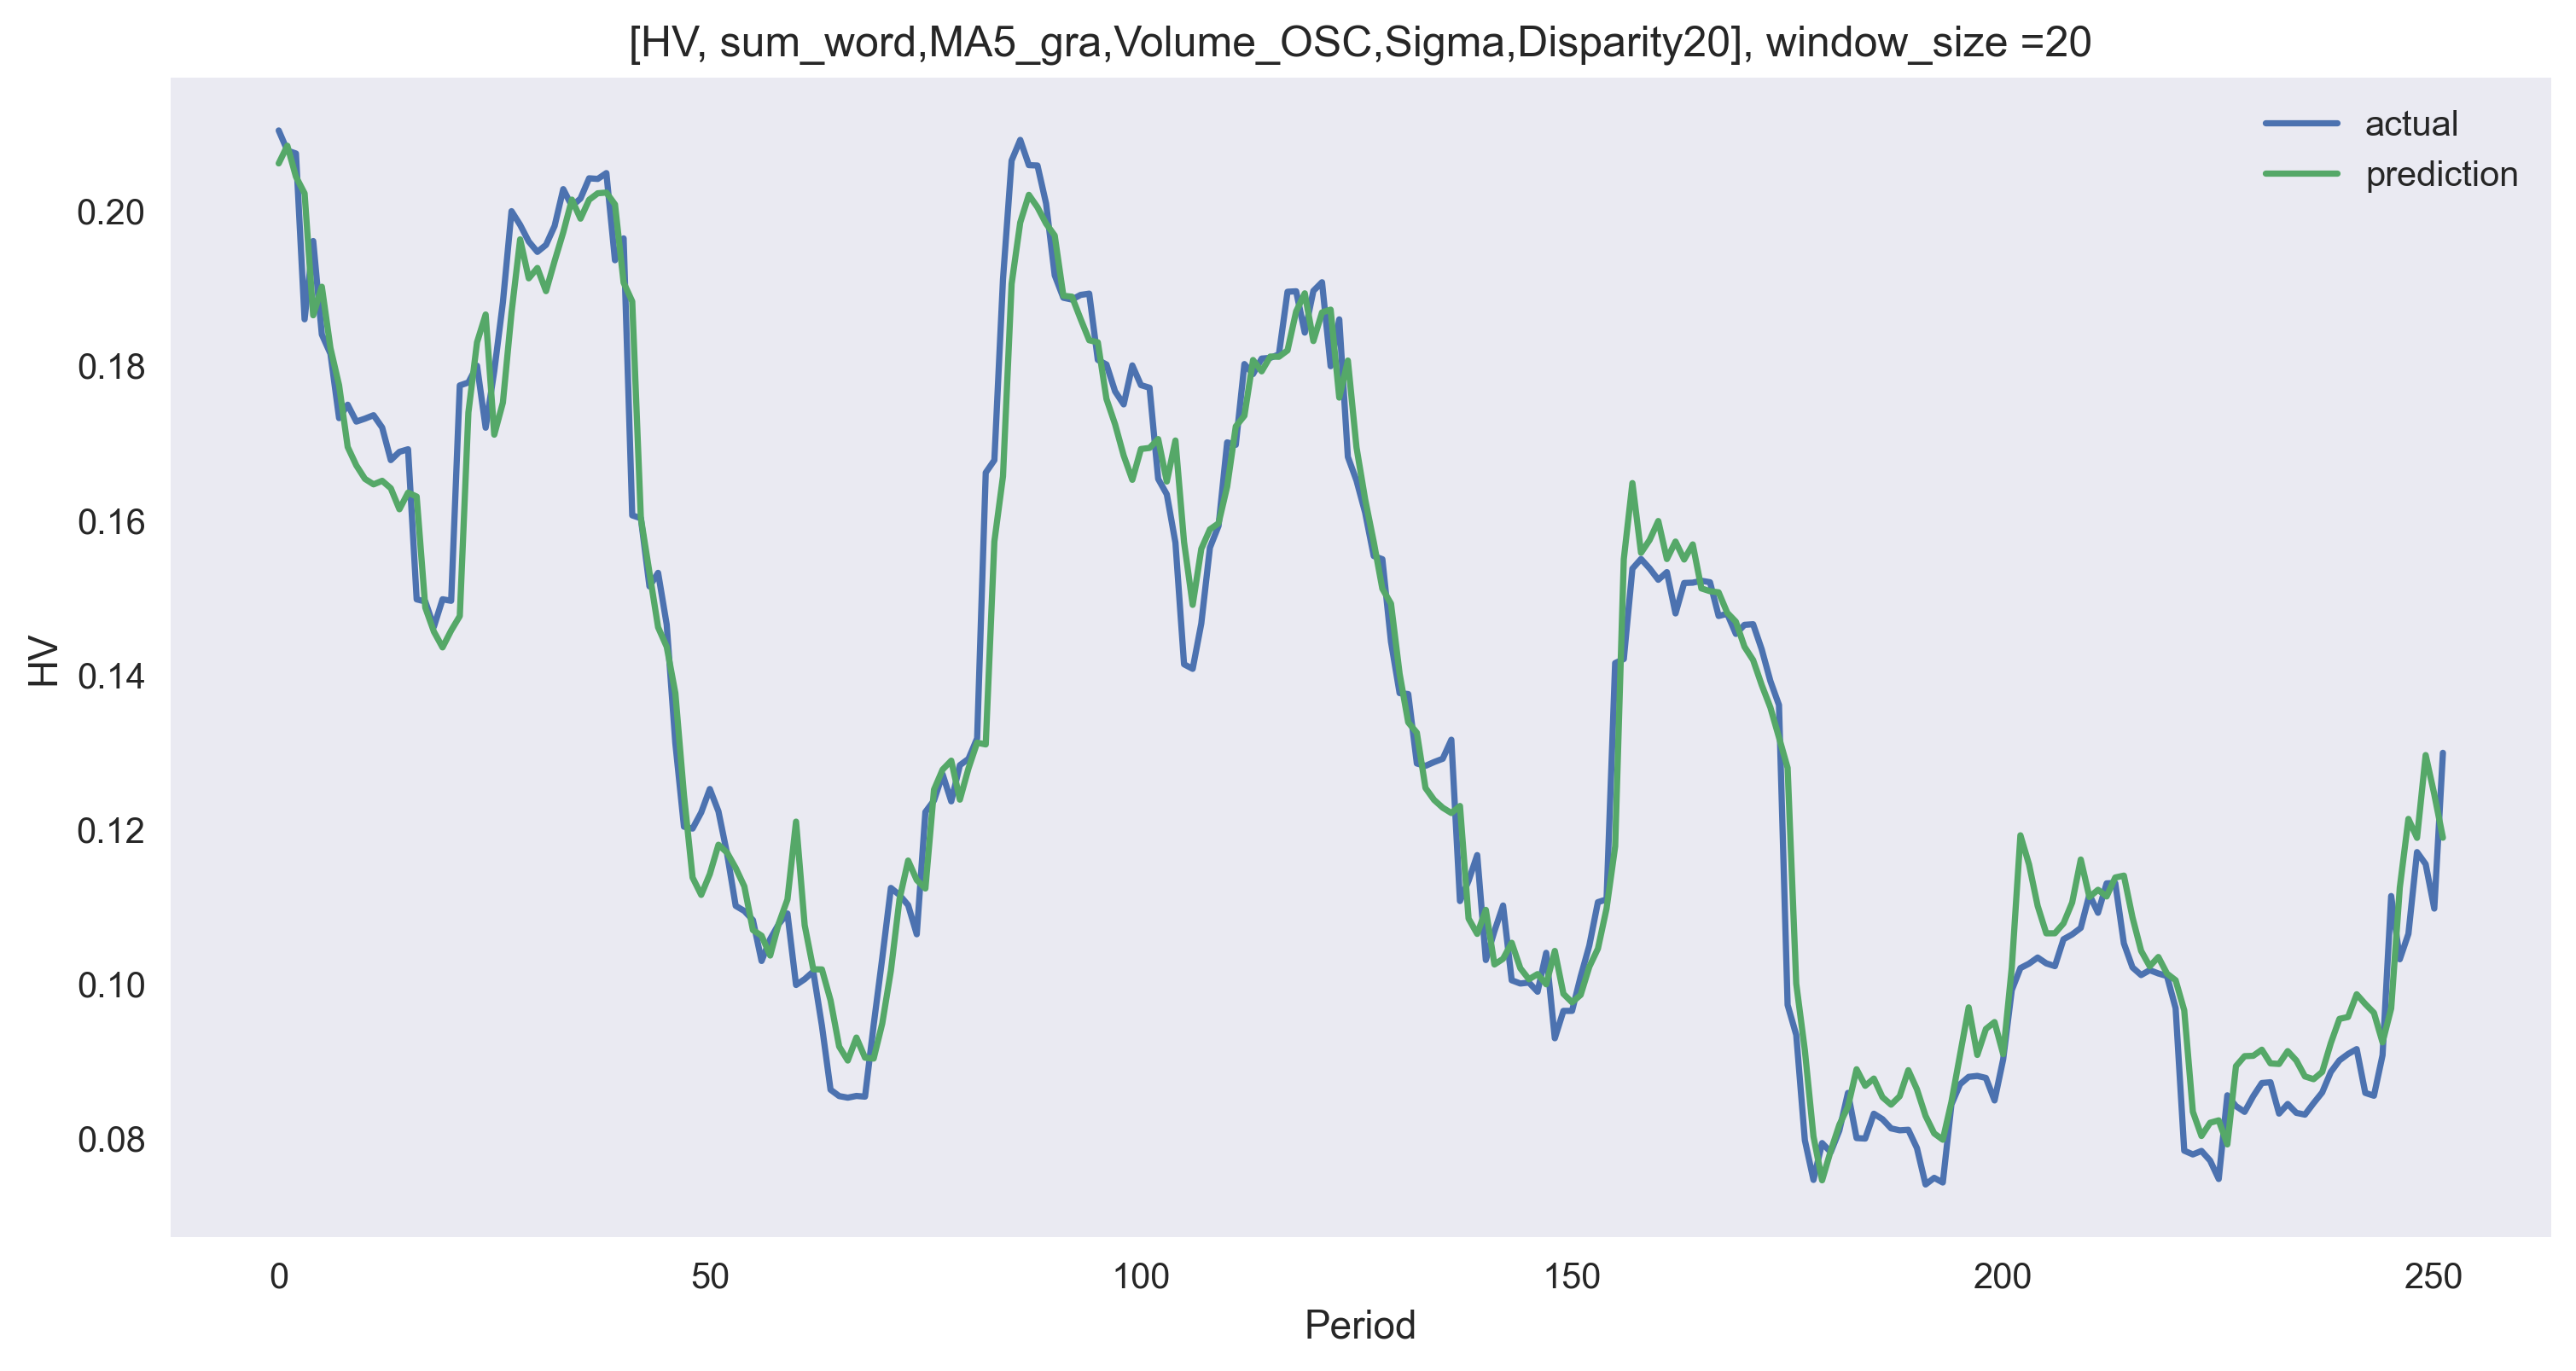

In [ ]:
plt.figure(figsize = (12,6))
plt.title('[HV, sum_word,MA5_gra,Volume_OSC,Sigma,Disparity20], window_size =20')
plt.ylabel('HV')
plt.xlabel('Period')
plt.plot(y_test_1st[-252:], label = 'actual')
plt.plot(pred[-252:], label = 'prediction')
plt.grid()
plt.legend(loc = 'best')

plt.show()

# 2019. 9. 29. ~ 2020. 9. 28.

In [ ]:
pred_2019 = pred[-505:-253]
pred_2019[:5]

array([[0.09139709],
       [0.09209584],
       [0.0935729 ],
       [0.09747657],
       [0.10439022]], dtype=float32)

In [ ]:
len(pred_2019)

252

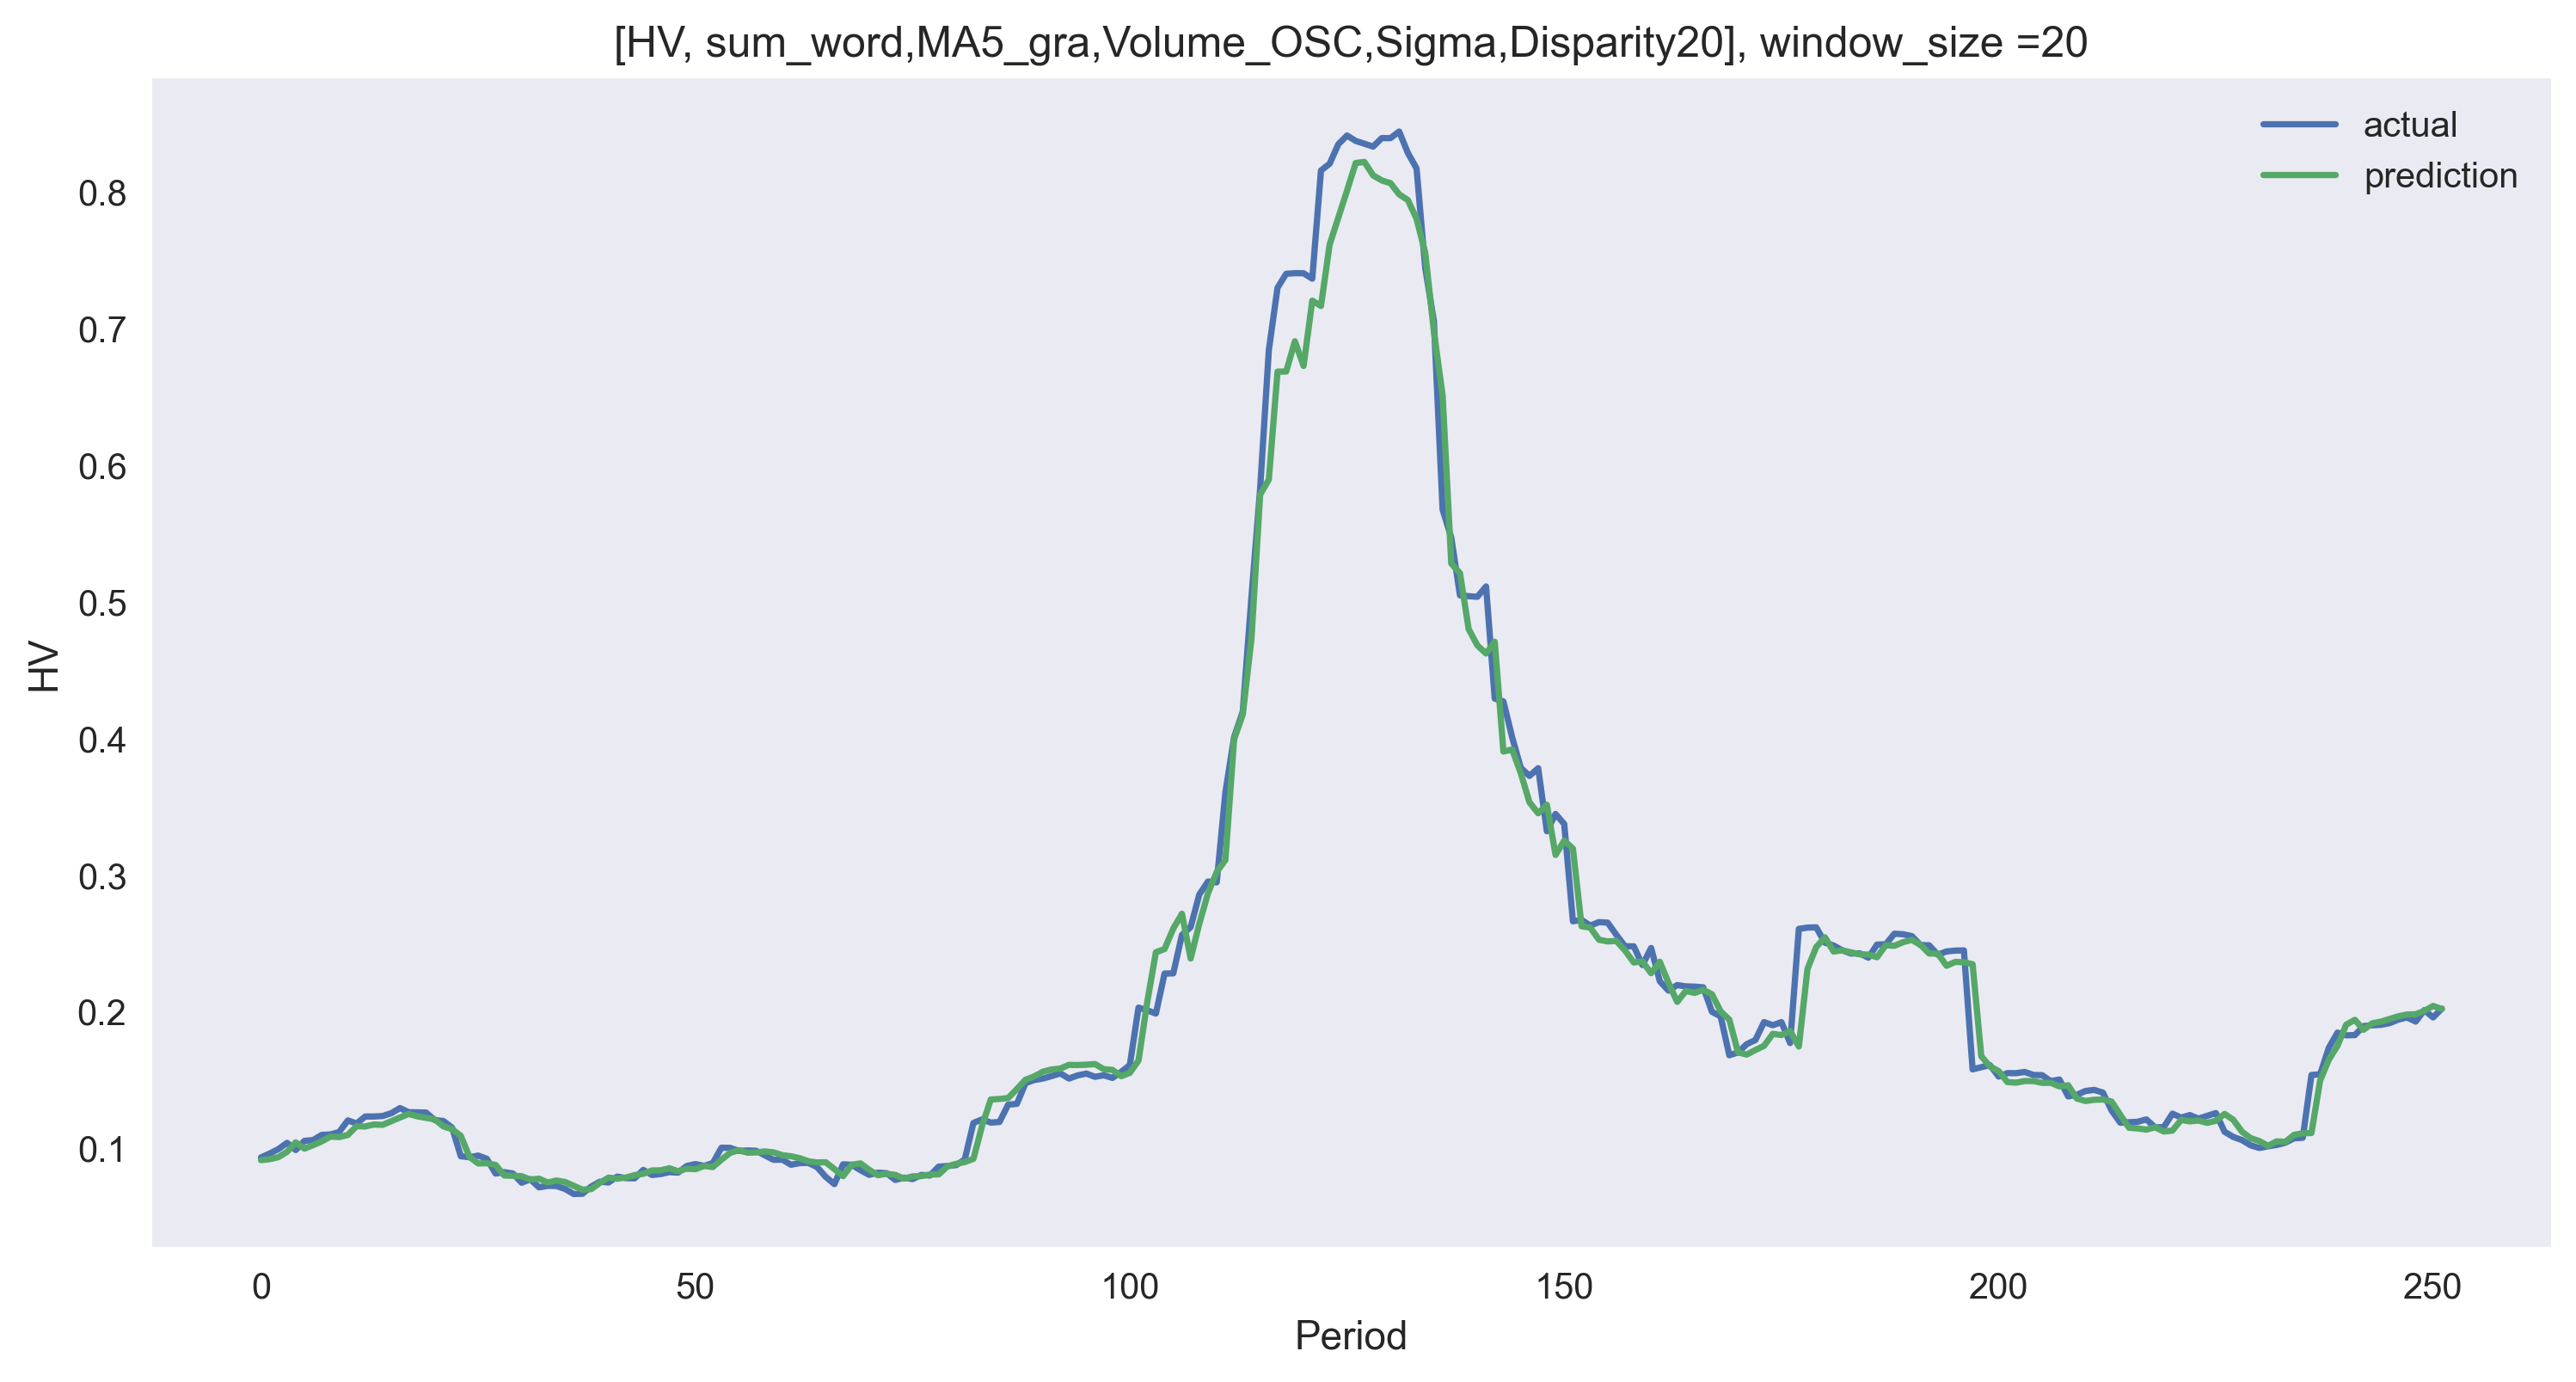

In [ ]:
plt.figure(figsize = (12,6))
plt.title('[HV, sum_word,MA5_gra,Volume_OSC,Sigma,Disparity20], window_size =20')
plt.ylabel('HV')
plt.xlabel('Period')
plt.plot(y_test_1st[-505:-253], label = 'actual')
plt.plot(pred[-505:-253], label = 'prediction')
plt.grid()
plt.legend(loc = 'best')

plt.show()

# 2018. 9. 29. ~ 2019. 9. 28.


In [ ]:
pred_2018 = pred[-758:-506]
pred_2018[:5]

array([[0.08937818],
       [0.08493702],
       [0.08425909],
       [0.08504786],
       [0.08290912]], dtype=float32)

In [ ]:
len(pred_2018)

252

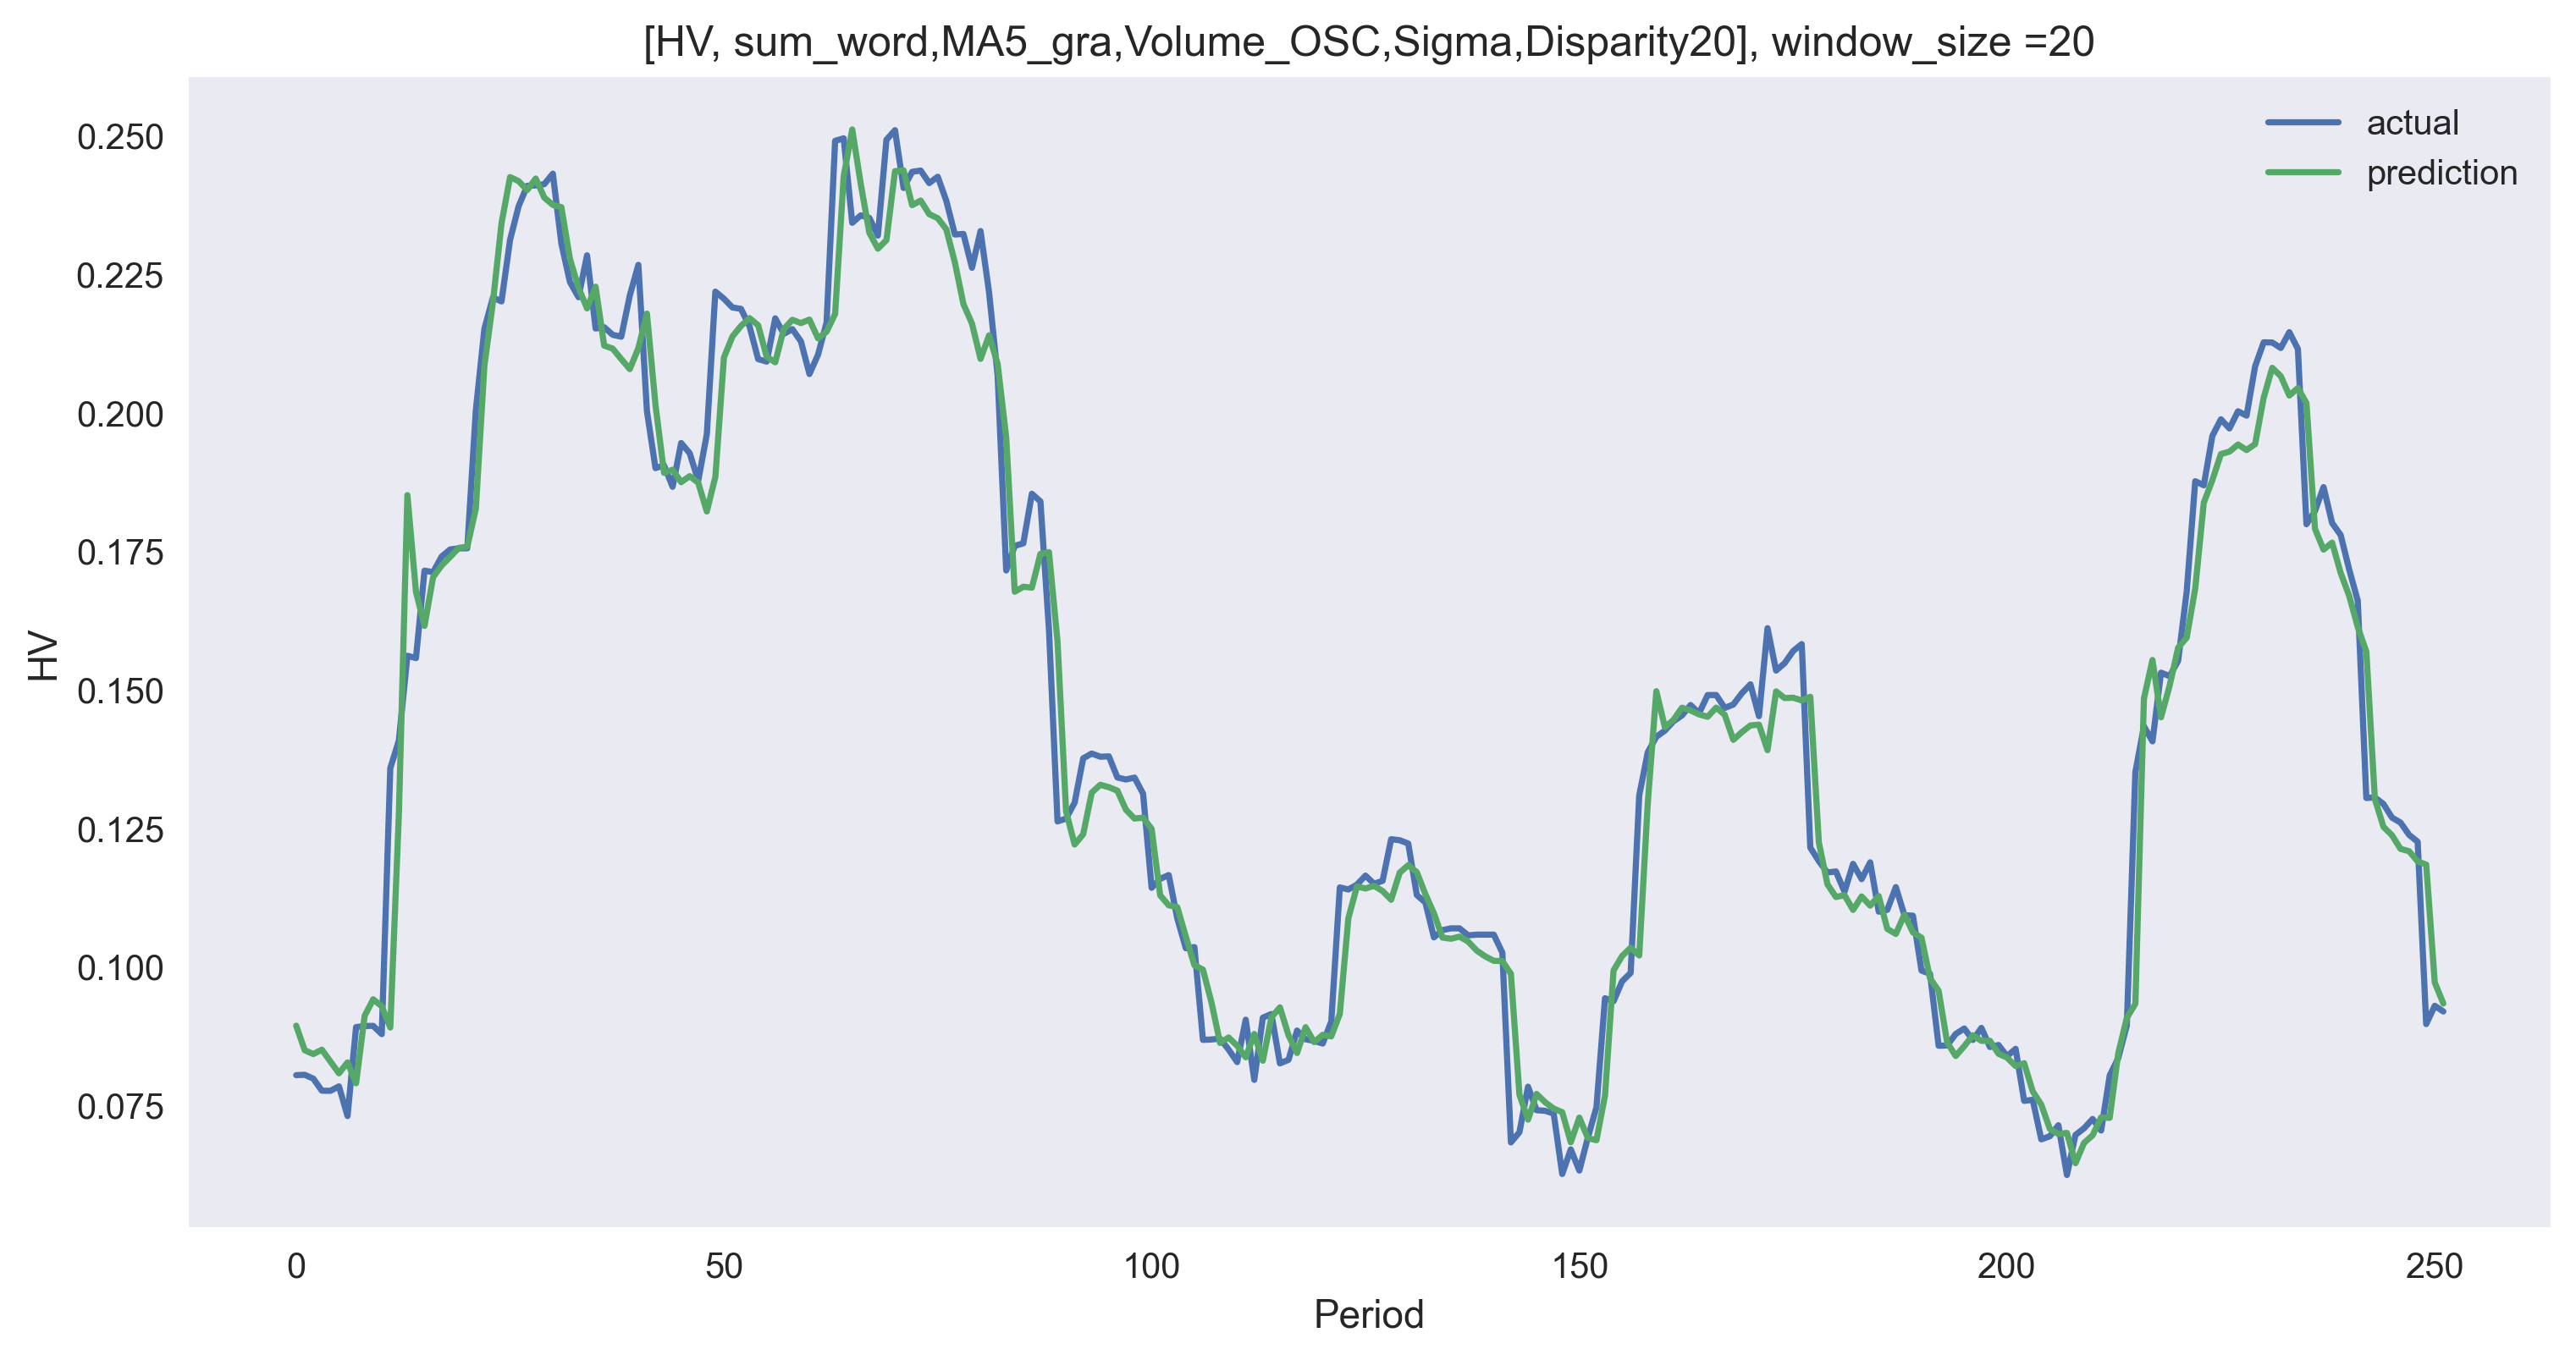

In [ ]:
plt.figure(figsize = (12,6))
plt.title('[HV, sum_word,MA5_gra,Volume_OSC,Sigma,Disparity20], window_size =20')
plt.ylabel('HV')
plt.xlabel('Period')
plt.plot(y_test_1st[-758:-506], label = 'actual')
plt.plot(pred[-758:-506], label = 'prediction')
plt.grid()
plt.legend(loc = 'best')

plt.show()

# 2017. 9. 29. ~ 2018. 9. 28.


In [ ]:
pred_2017 = pred[-1011:-759]
pred_2017[:5]

array([[0.07309887],
       [0.07385932],
       [0.07648416],
       [0.07624134],
       [0.07540558]], dtype=float32)

In [ ]:
len(pred_2017)

252

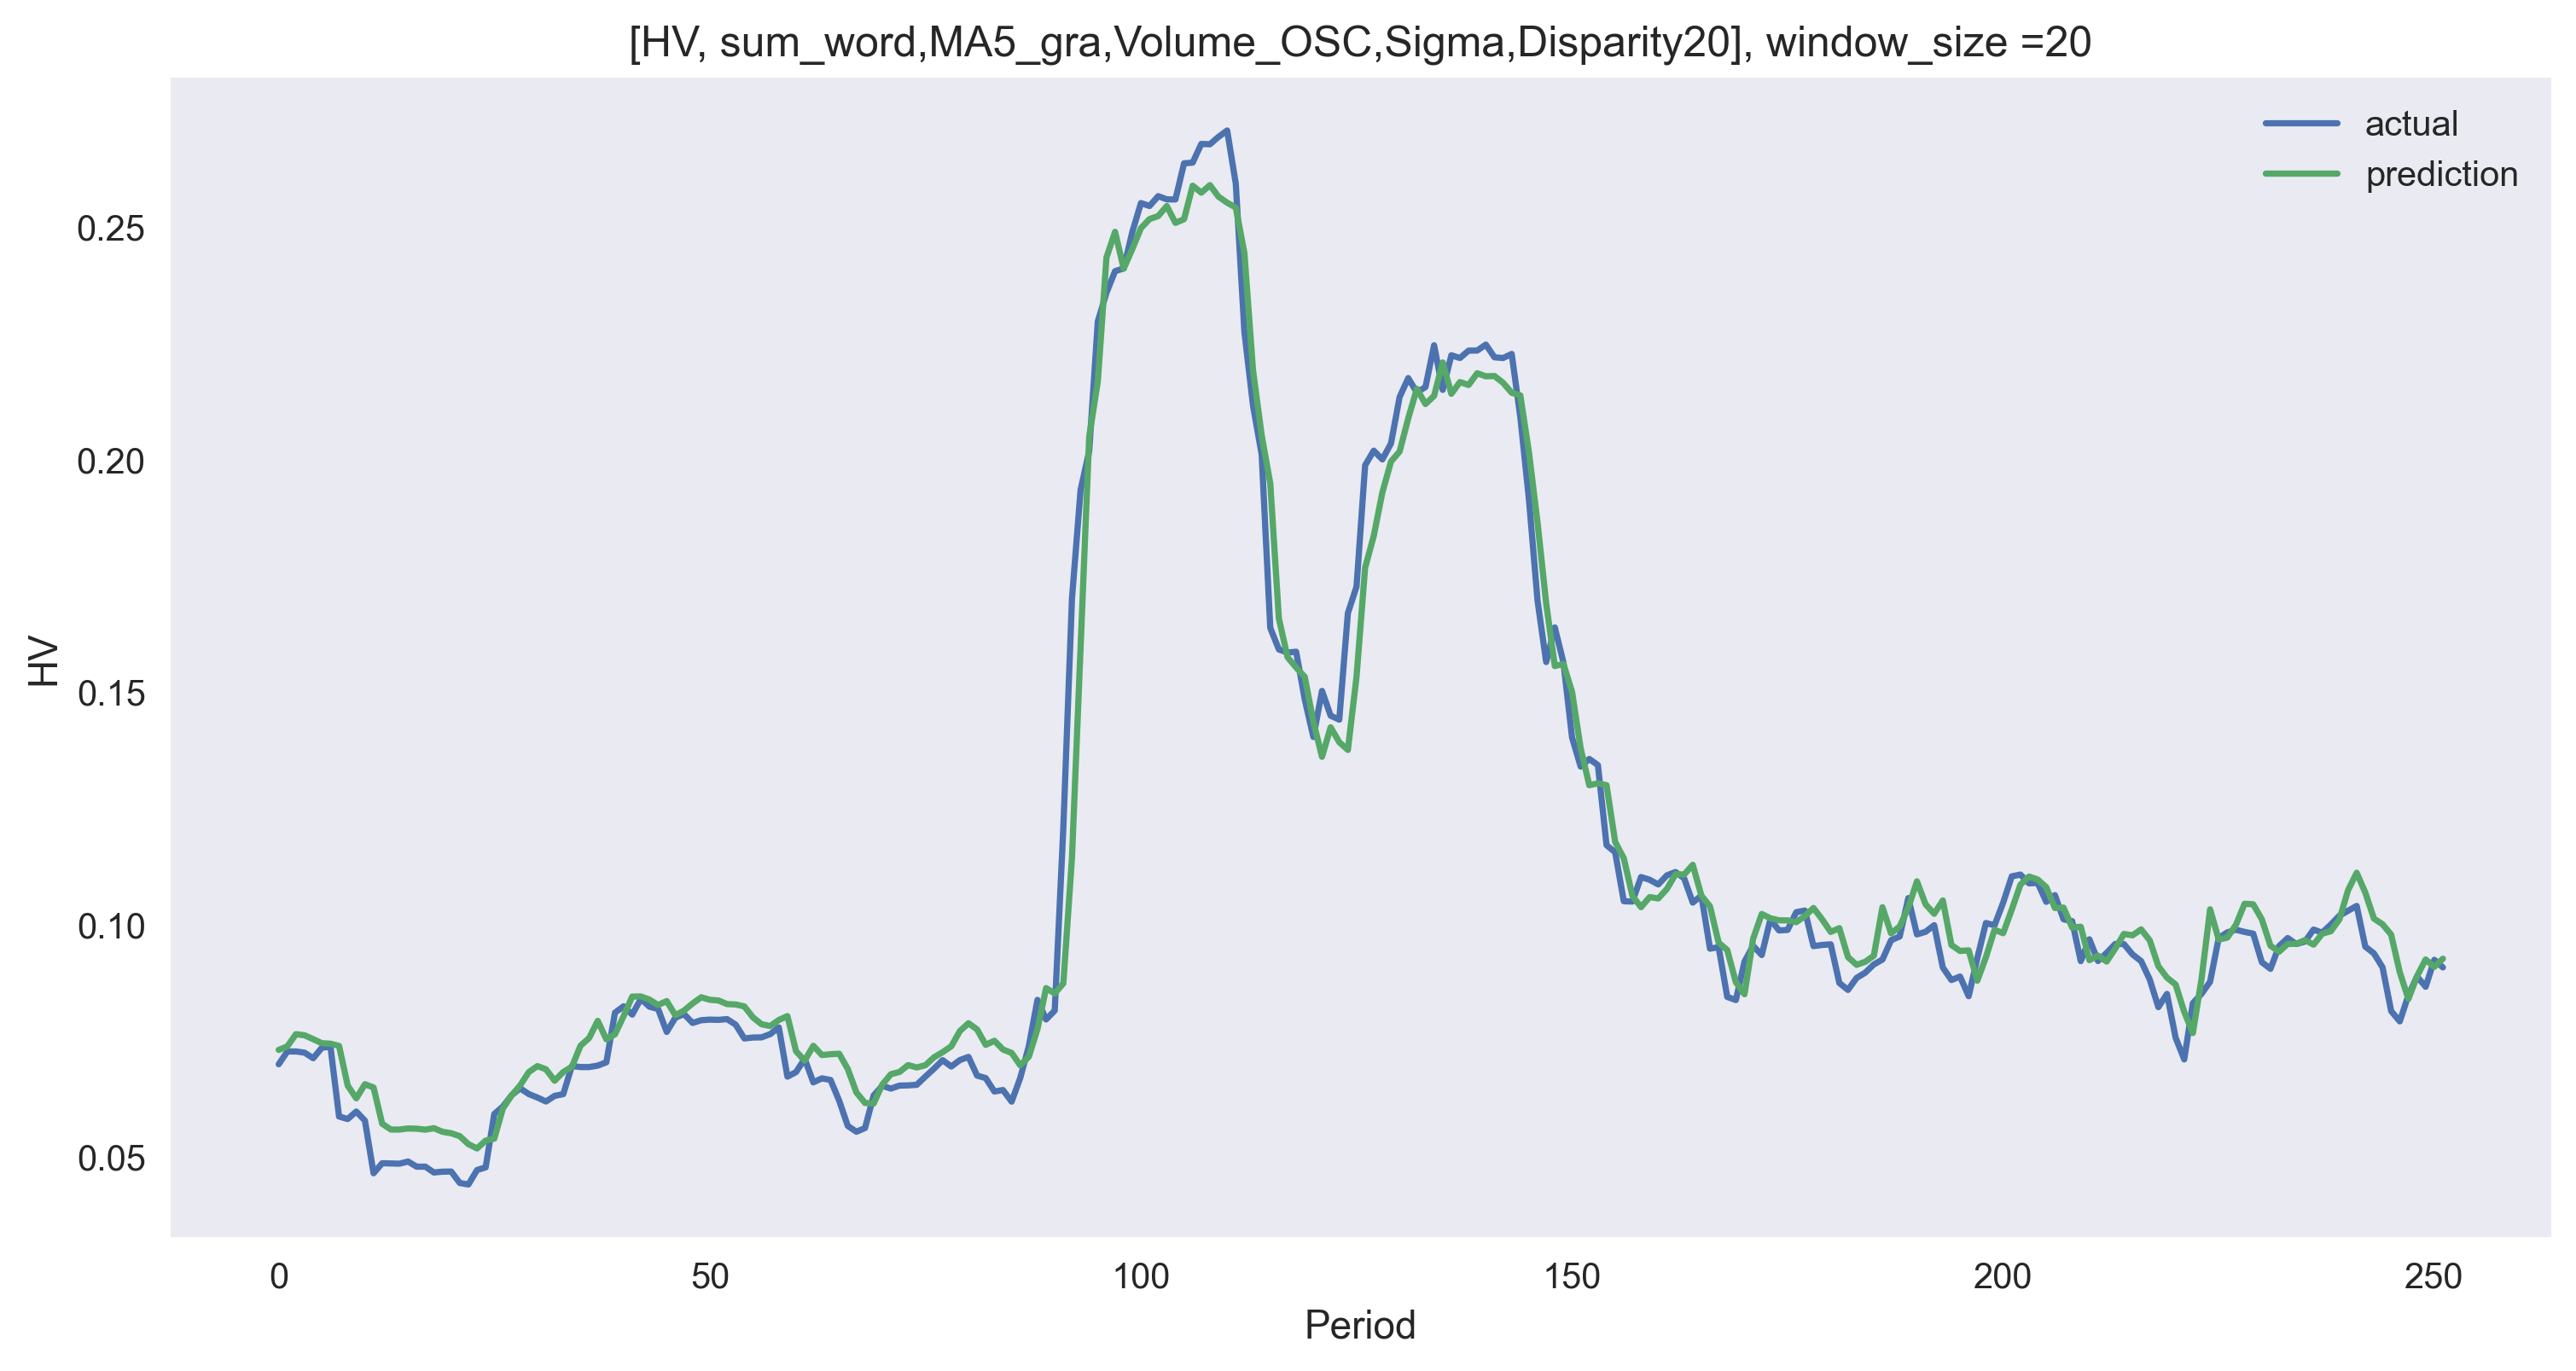

In [ ]:
plt.figure(figsize = (12,6))
plt.title('[HV, sum_word,MA5_gra,Volume_OSC,Sigma,Disparity20], window_size =20')
plt.ylabel('HV')
plt.xlabel('Period')
plt.plot(y_test_1st[-1011:-759], label = 'actual')
plt.plot(pred[-1011:-759], label = 'prediction')
plt.grid()
plt.legend(loc = 'best')

plt.show()

# 2016. 9. 29. ~ 2017. 9. 28.
252

In [ ]:
pred_2016 = pred[-1264:-1012]
pred_2016[:5]

array([[0.13368747],
       [0.1397368 ],
       [0.1412357 ],
       [0.14339516],
       [0.14690408]], dtype=float32)

In [ ]:
len(pred_2016)

252

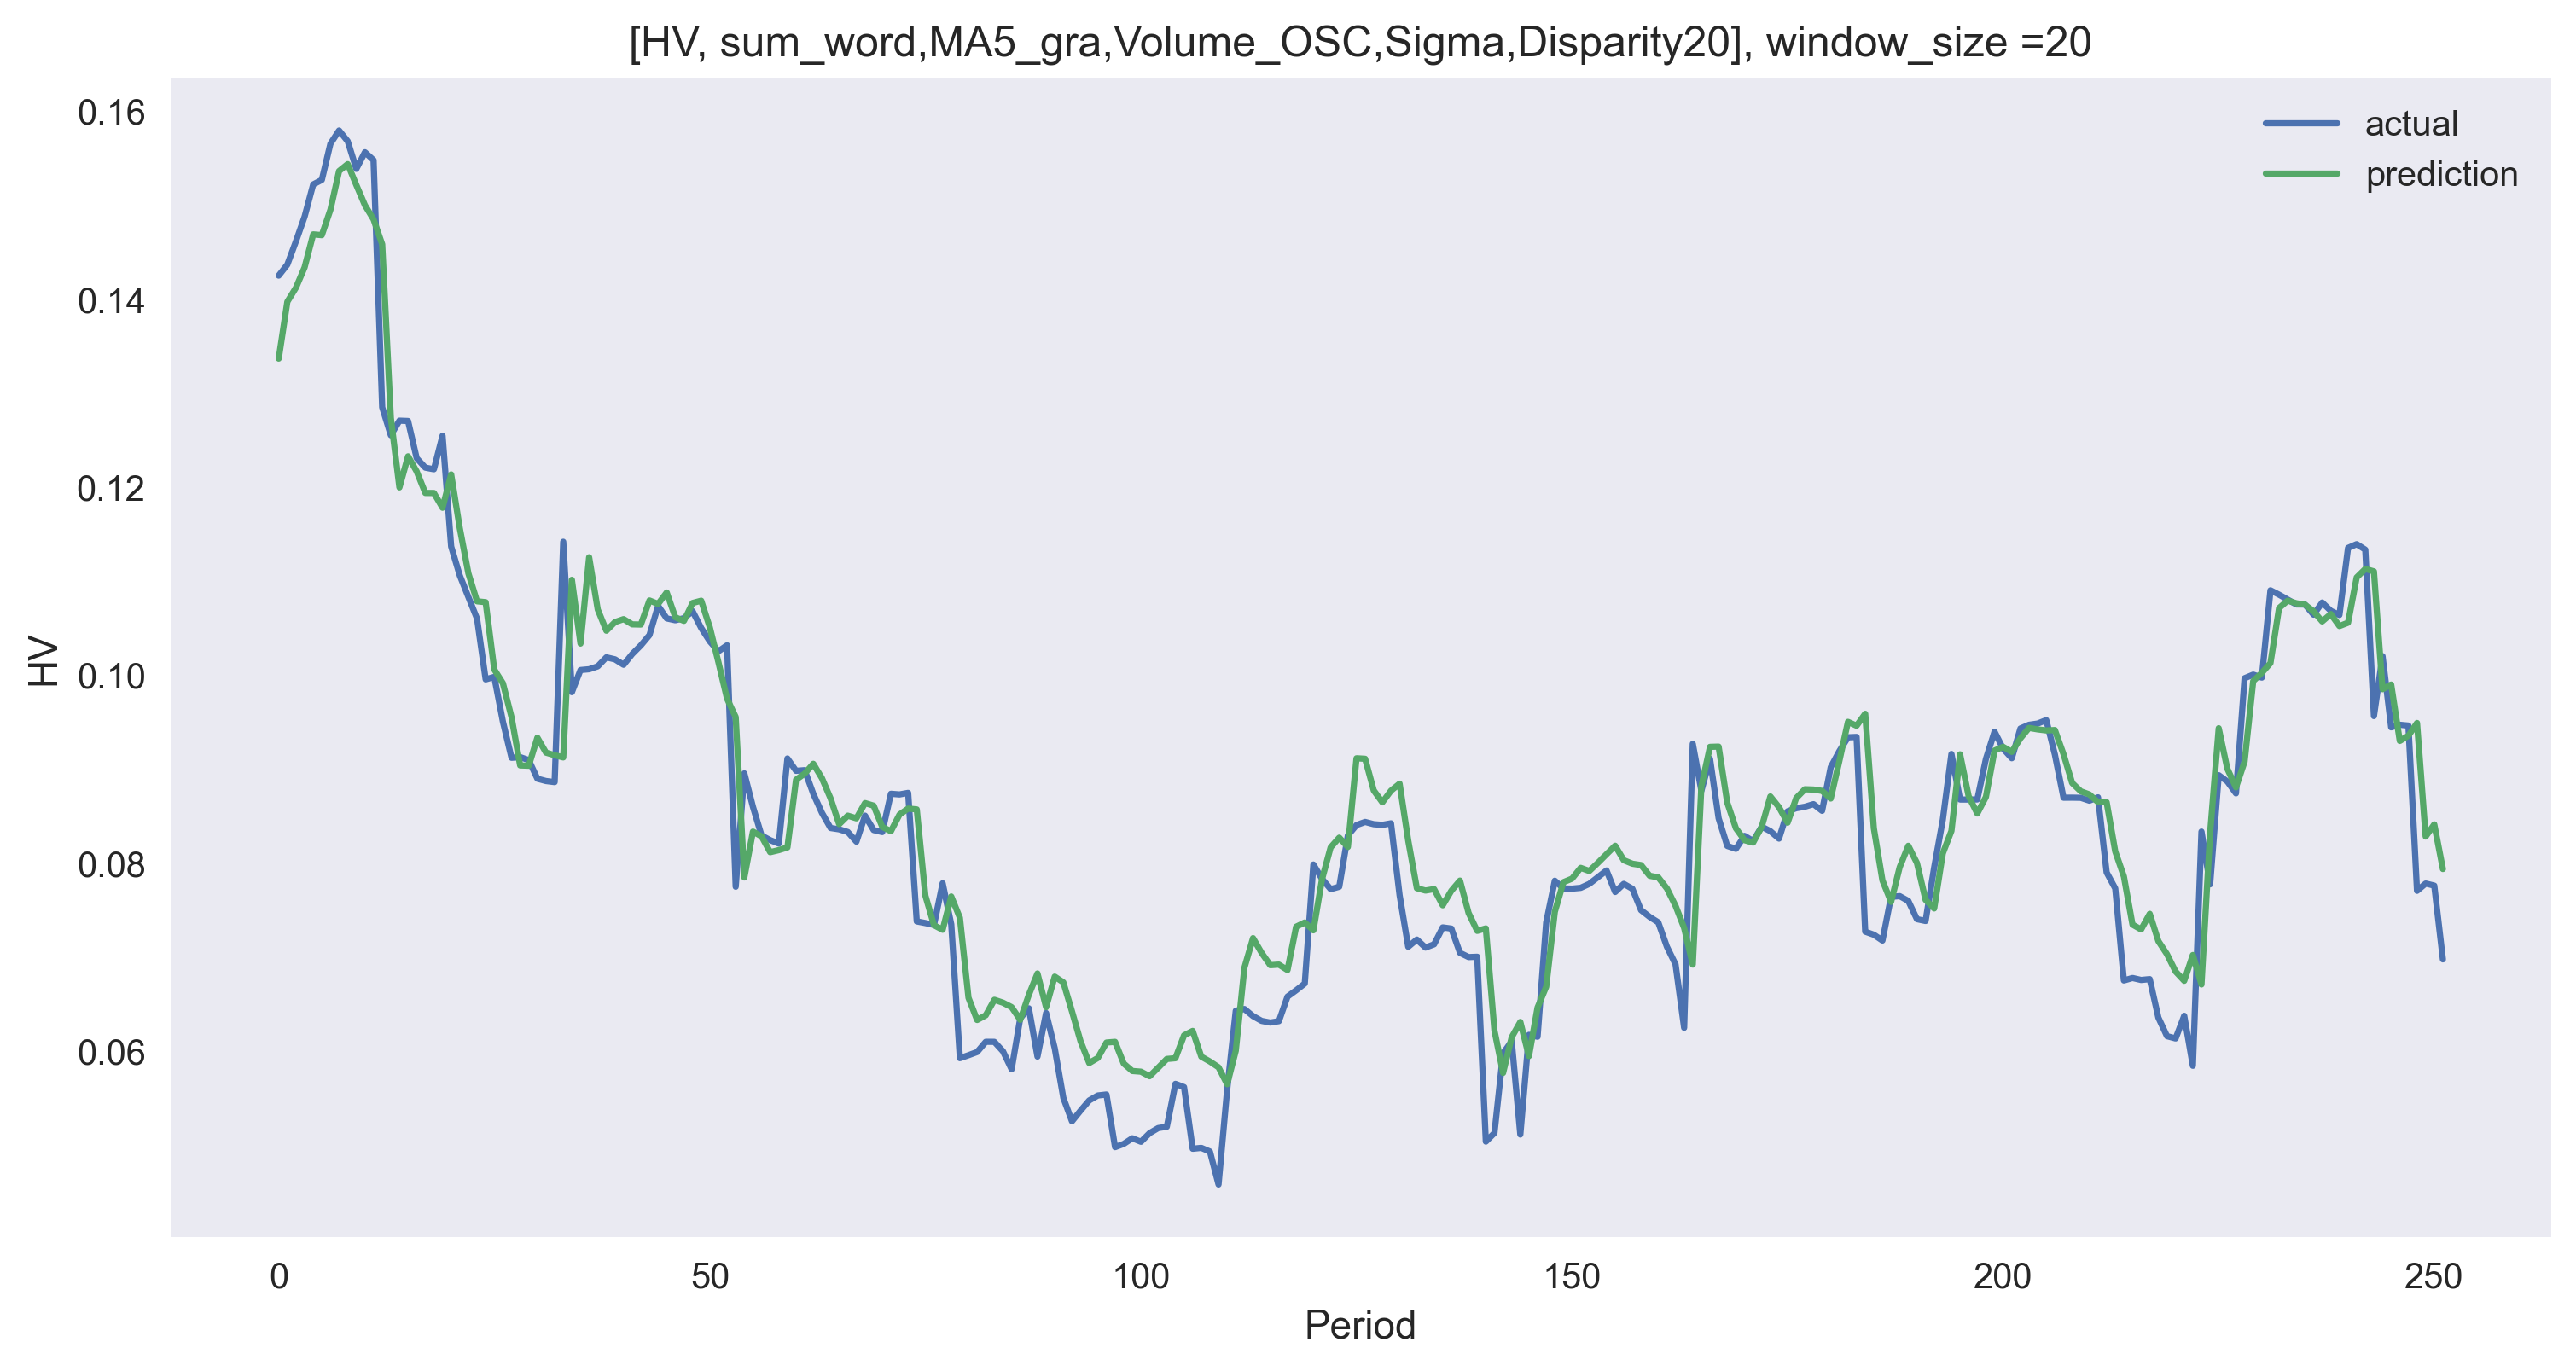

In [ ]:
plt.figure(figsize = (12,6))
plt.title('[HV, sum_word,MA5_gra,Volume_OSC,Sigma,Disparity20], window_size =20')
plt.ylabel('HV')
plt.xlabel('Period')
plt.plot(y_test_1st[-1264:-1012], label = 'actual')
plt.plot(pred[-1264:-1012], label = 'prediction')
plt.grid()
plt.legend(loc = 'best')

plt.show()

# 2015. 9. 29. ~ 2016. 9. 28.
252

In [ ]:
pred_2015 = pred[-1517:-1265]
pred_2015[:5]

array([[0.26762253],
       [0.24862155],
       [0.23123214],
       [0.22695988],
       [0.20438413]], dtype=float32)

In [ ]:
len(pred_2015)

252

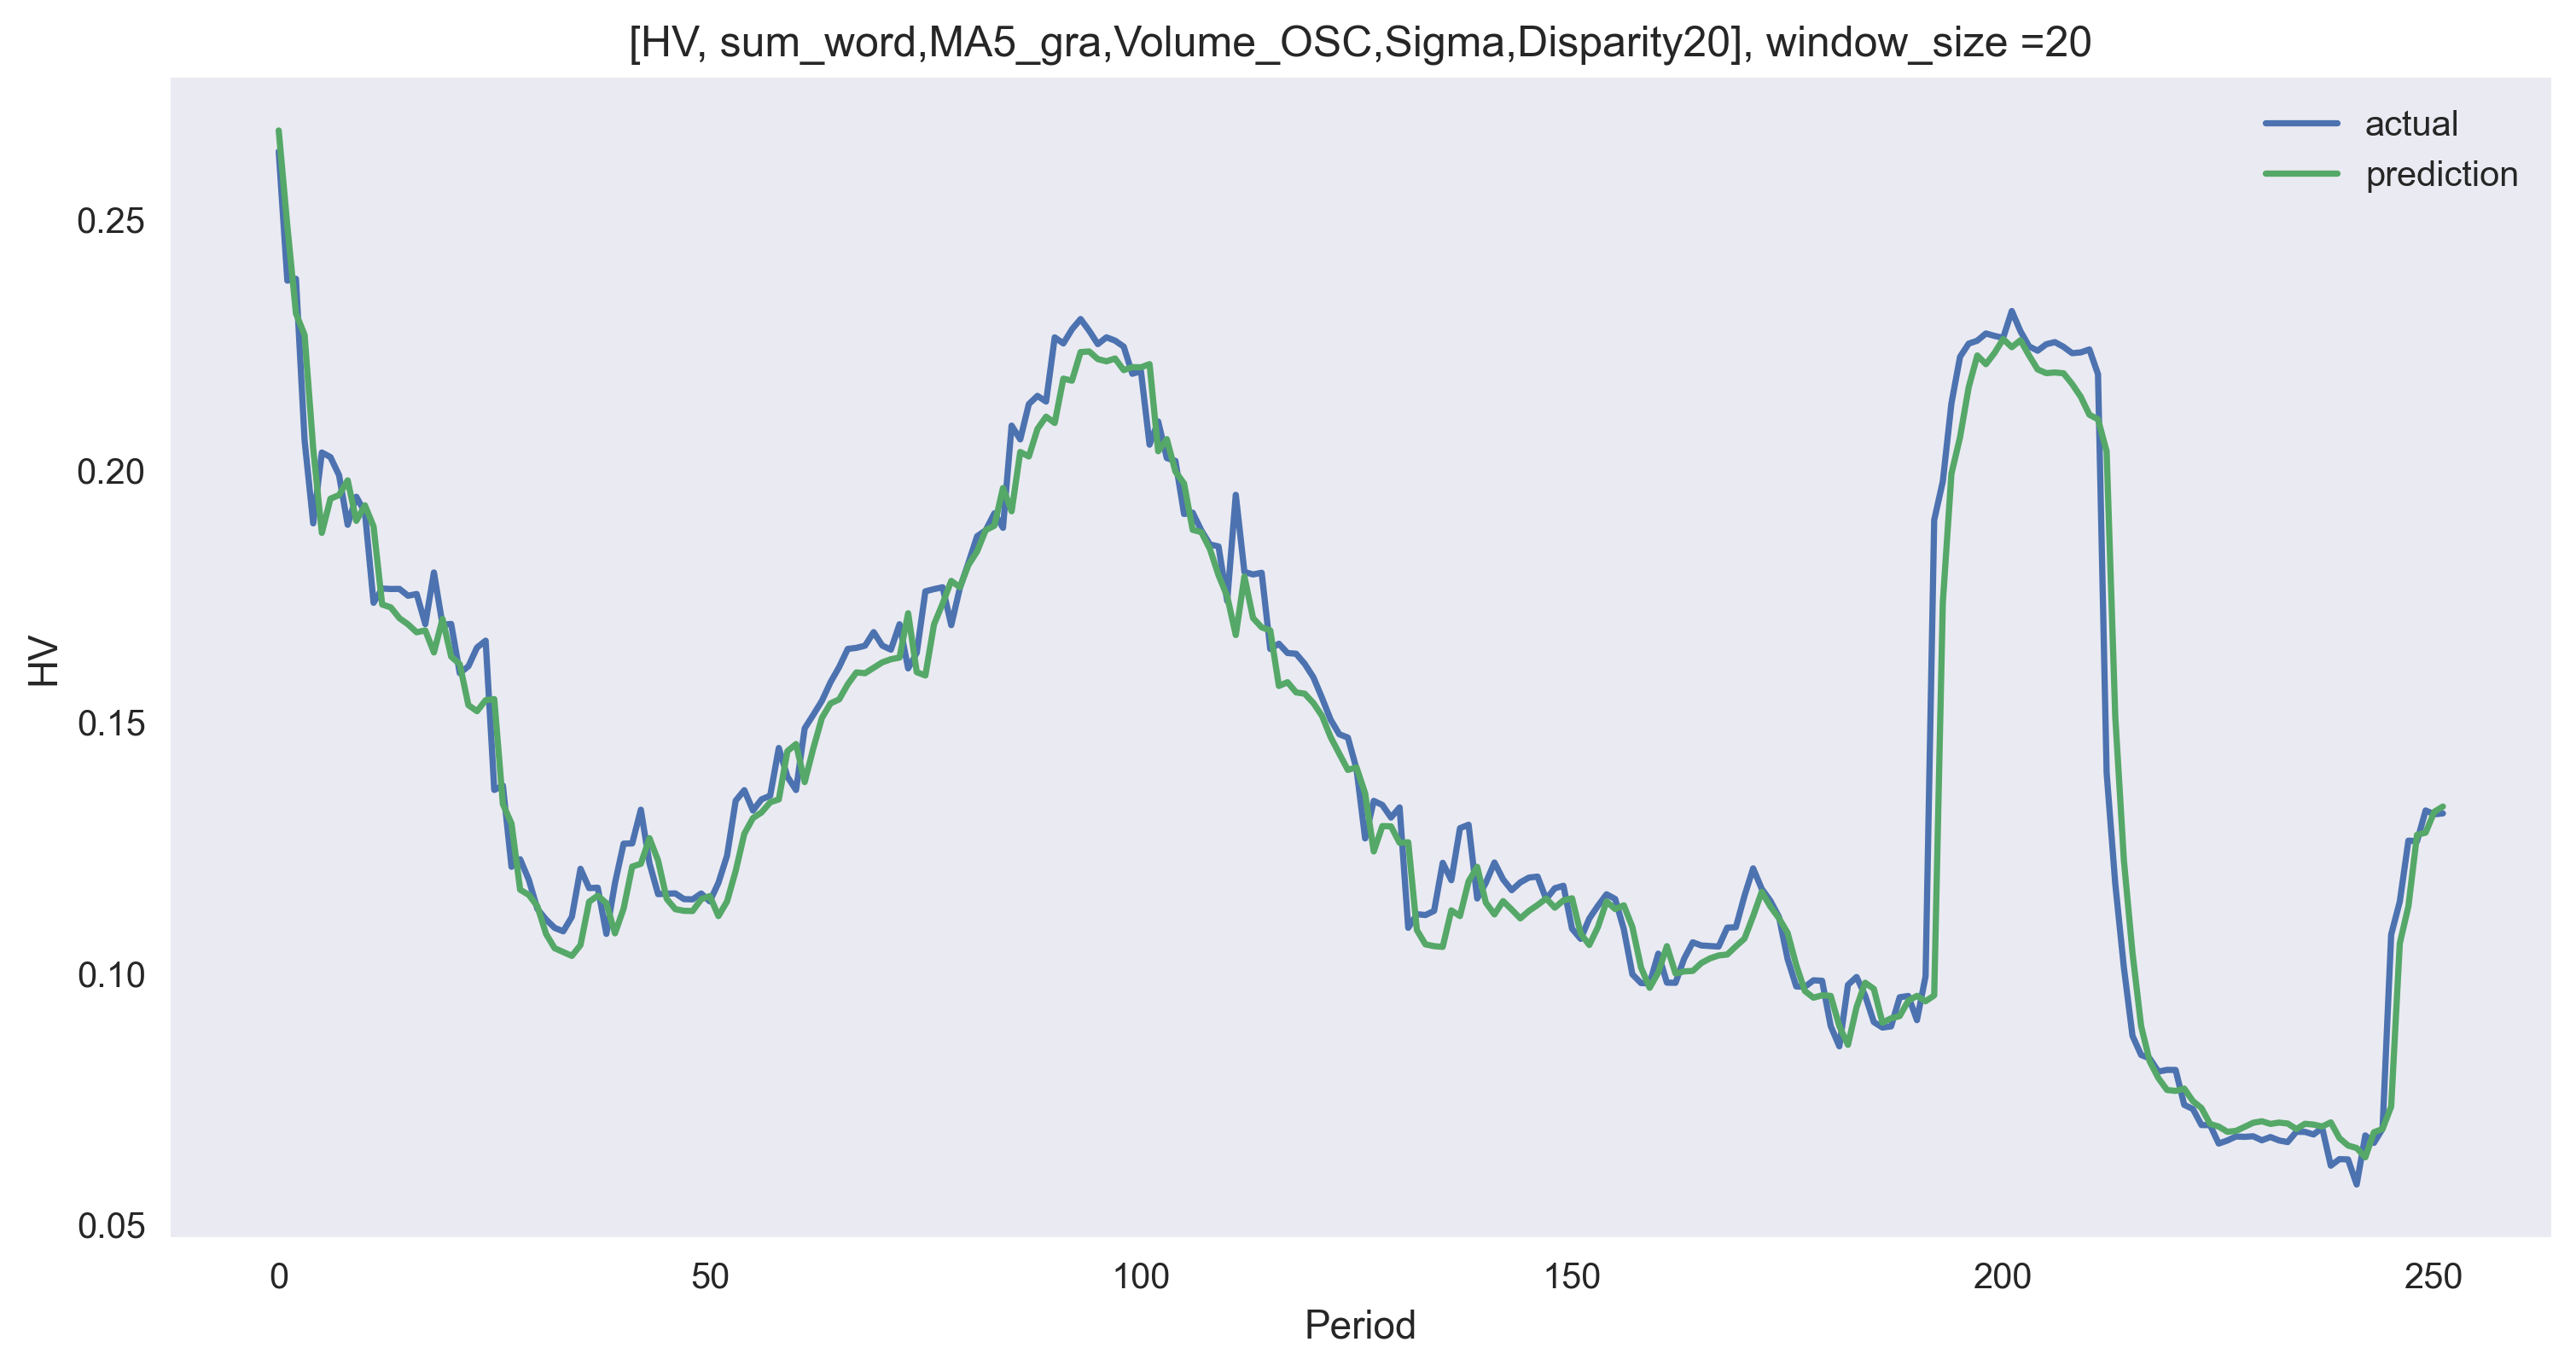

In [ ]:
plt.figure(figsize = (12,6))
plt.title('[HV, sum_word,MA5_gra,Volume_OSC,Sigma,Disparity20], window_size =20')
plt.ylabel('HV')
plt.xlabel('Period')
plt.plot(y_test_1st[-1517:-1265], label = 'actual')
plt.plot(pred[-1517:-1265], label = 'prediction')
plt.grid()
plt.legend(loc = 'best')

plt.show()

# 2014. 9. 29. ~ 2015. 9. 28.
252

In [ ]:
pred_2014 = pred[-1770:-1518]
pred_2014[:5]

array([[0.06094303],
       [0.06036858],
       [0.06228554],
       [0.06651179],
       [0.06709595]], dtype=float32)

In [ ]:
len(pred_2014)

252

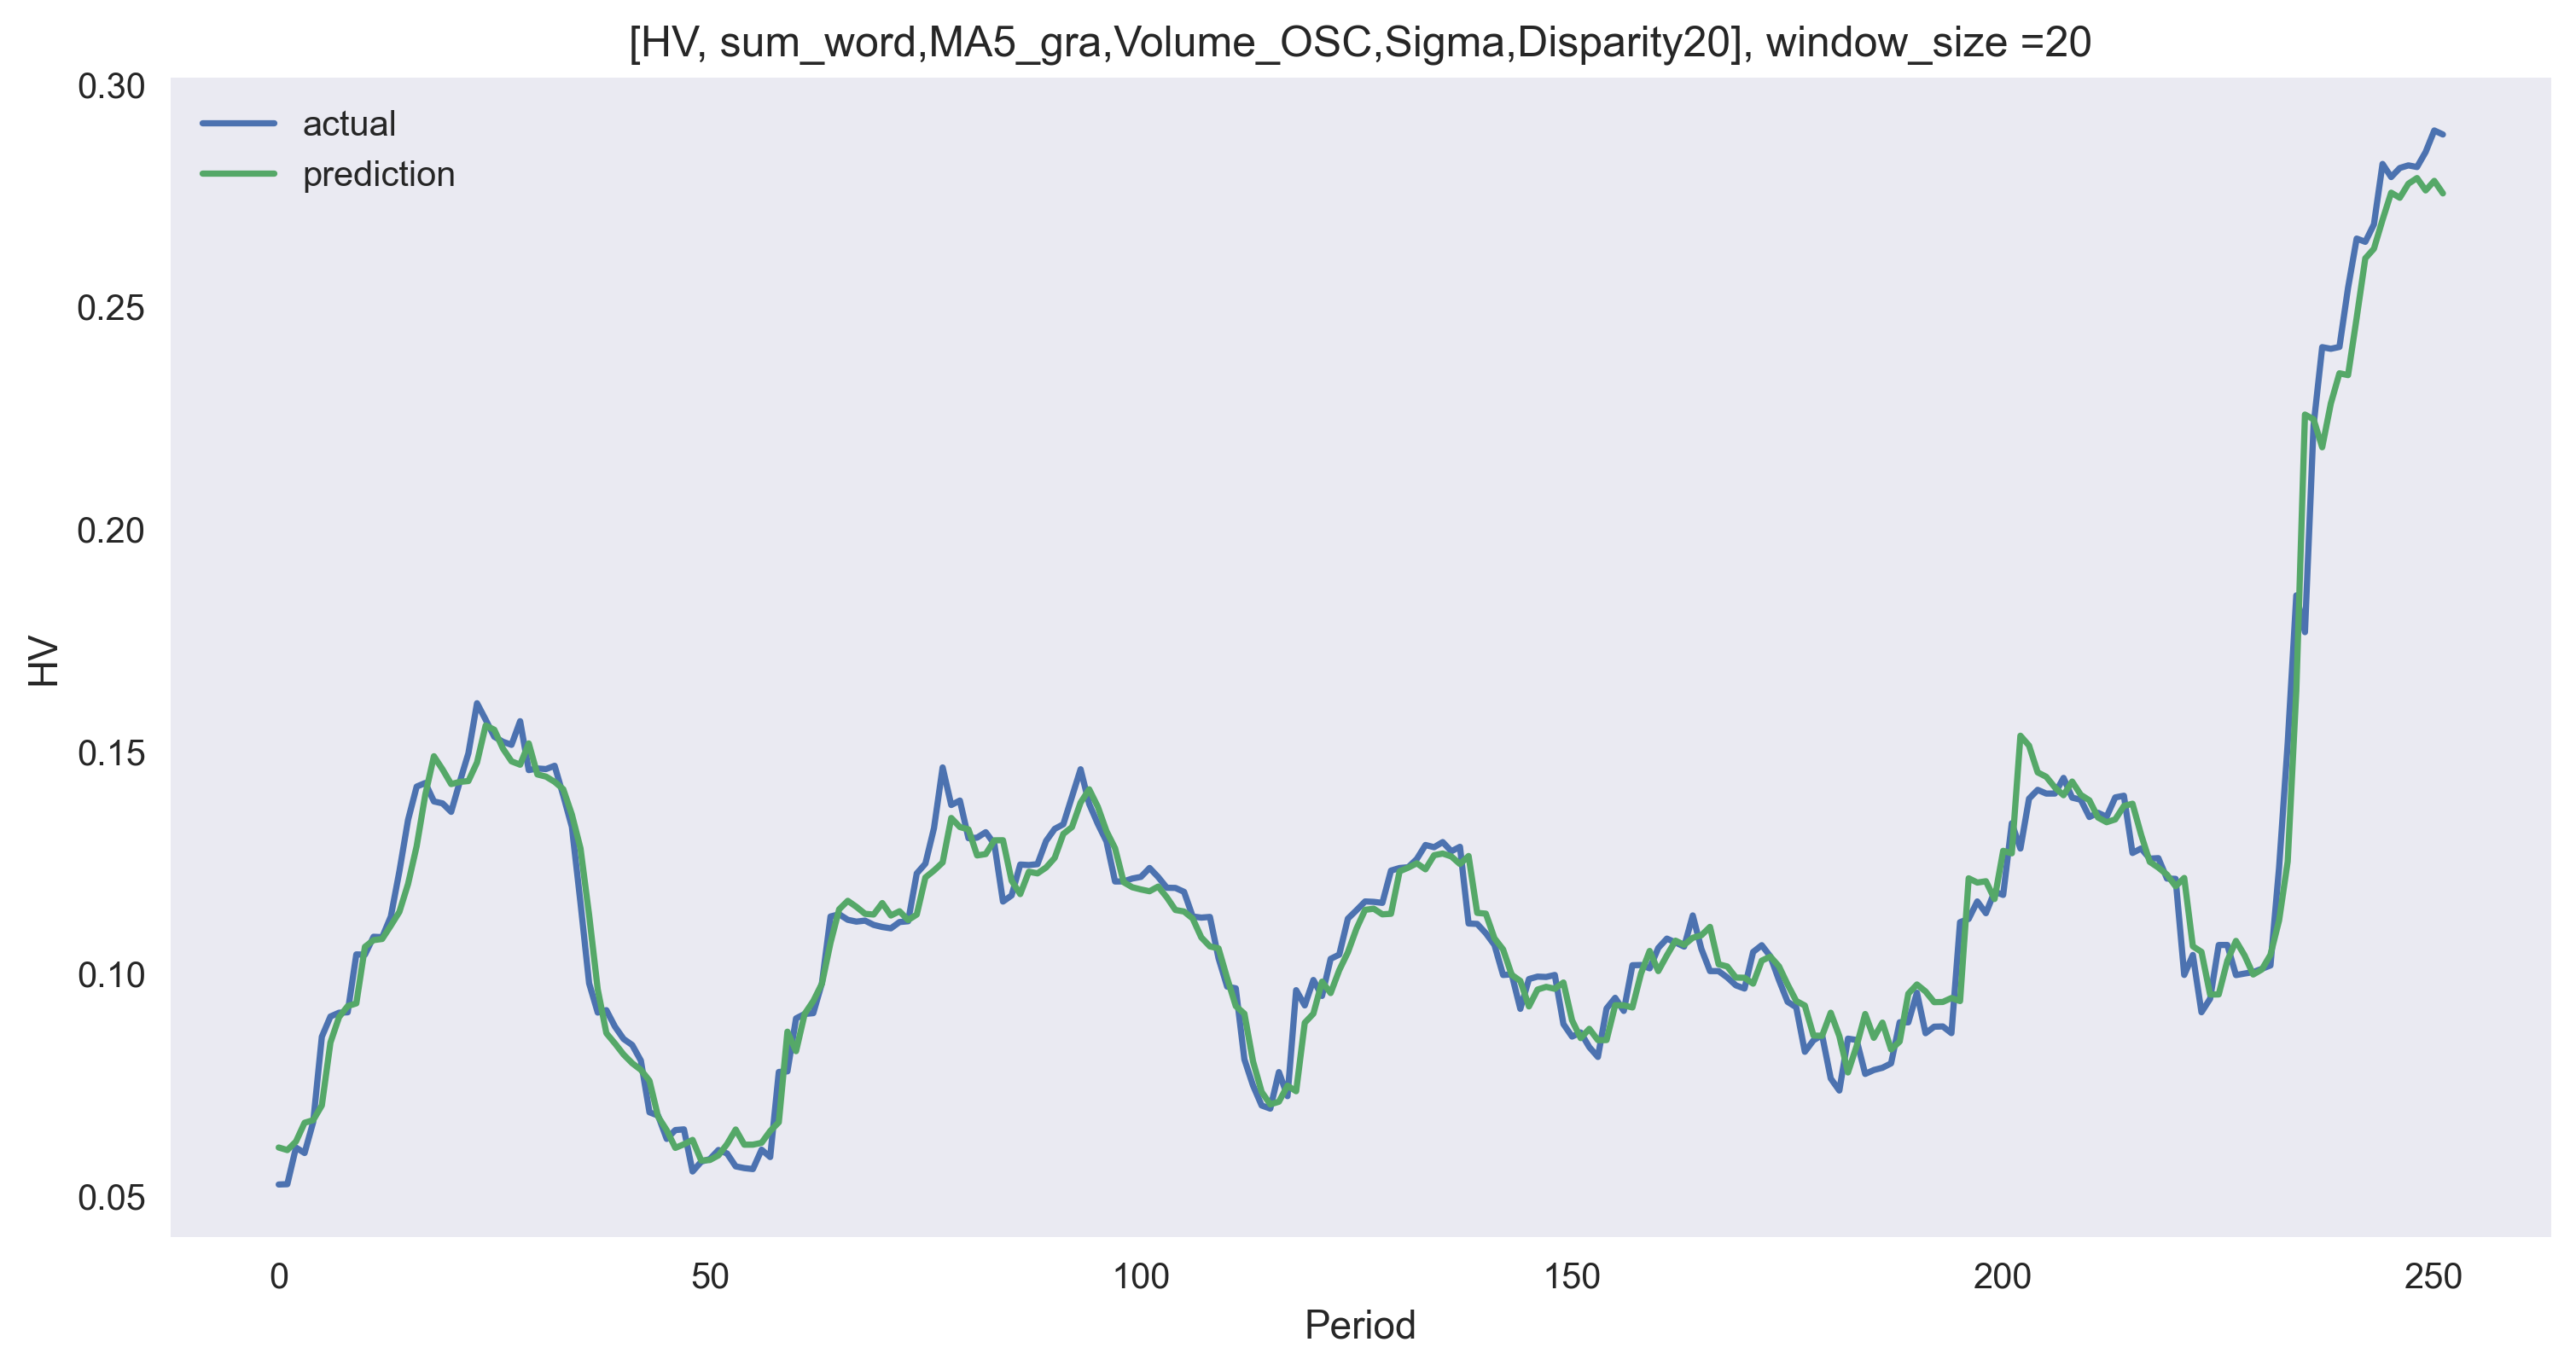

In [ ]:
plt.figure(figsize = (12,6))
plt.title('[HV, sum_word,MA5_gra,Volume_OSC,Sigma,Disparity20], window_size =20')
plt.ylabel('HV')
plt.xlabel('Period')
plt.plot(y_test_1st[-1770:-1518], label = 'actual')
plt.plot(pred[-1770:-1518], label = 'prediction')
plt.grid()
plt.legend(loc = 'best')

plt.show()

# 2013. 9. 29. ~ 2014. 9. 28.

In [ ]:
252+1771

2023

In [ ]:
pred_2013 = pred[-2023:-1771]
pred_2013[:5]

array([[0.10532643],
       [0.10287705],
       [0.11160876],
       [0.10770914],
       [0.11139251]], dtype=float32)

In [ ]:
len(pred_2013)

252

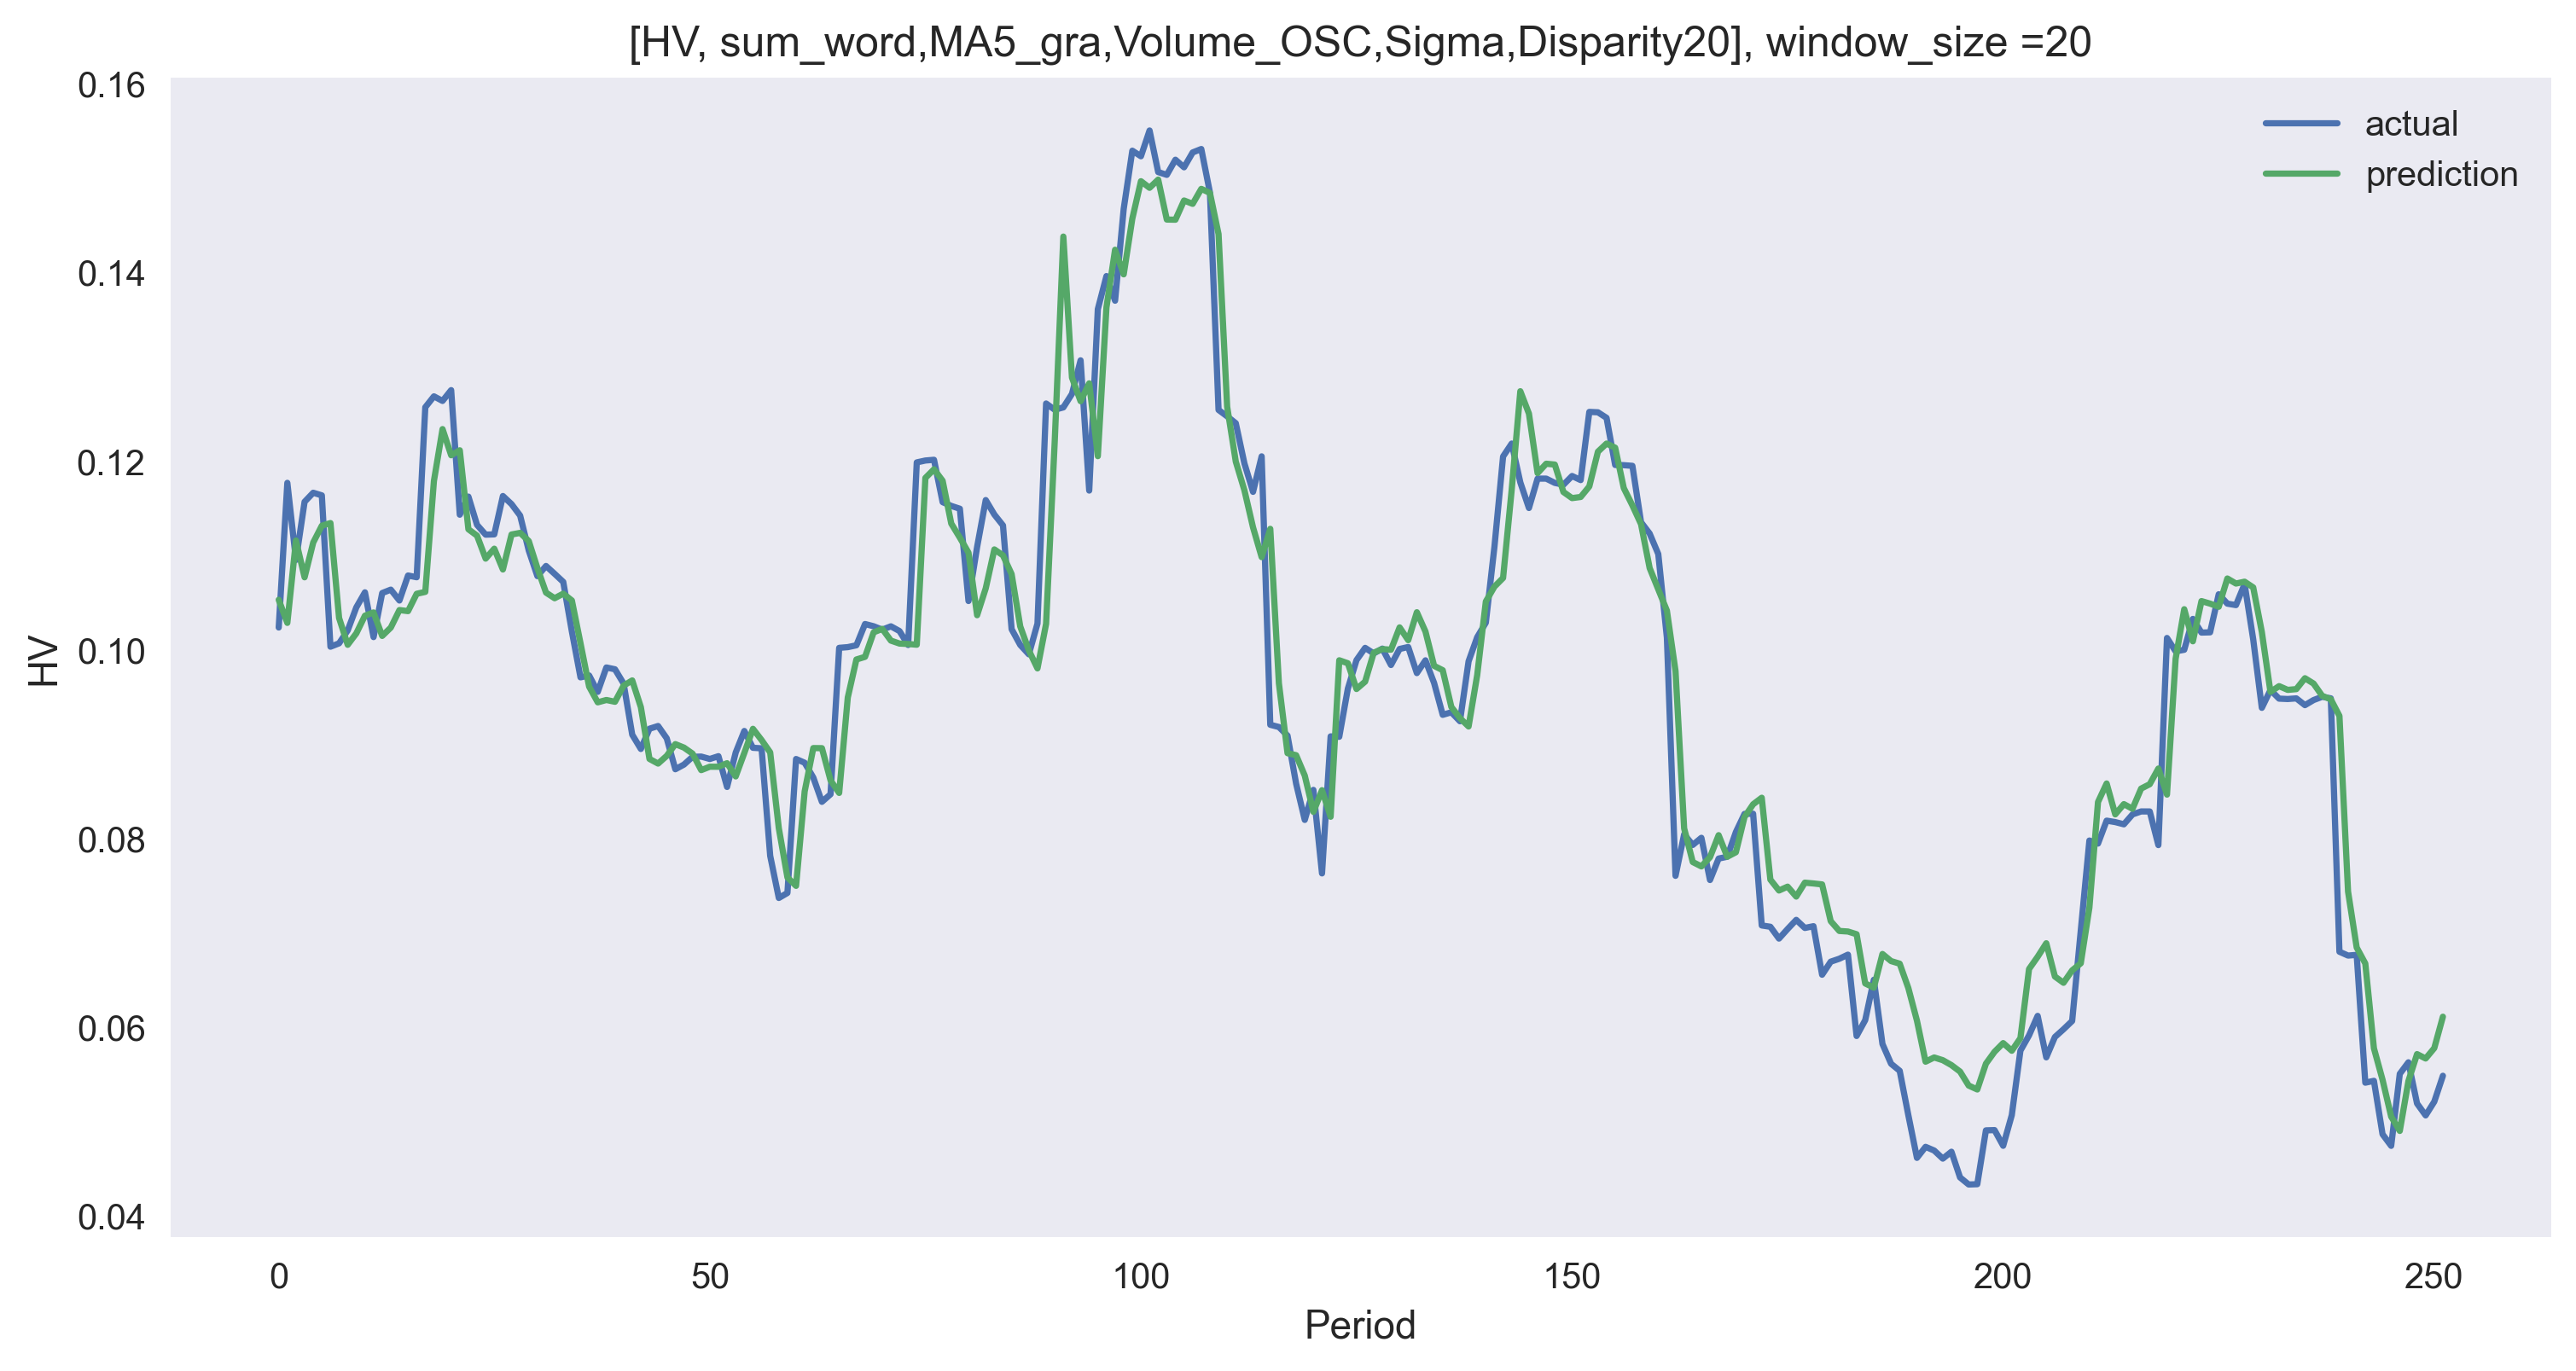

In [ ]:
plt.figure(figsize = (12,6))
plt.title('[HV, sum_word,MA5_gra,Volume_OSC,Sigma,Disparity20], window_size =20')
plt.ylabel('HV')
plt.xlabel('Period')
plt.plot(y_test_1st[-2023:-1771], label = 'actual')
plt.plot(pred[-2023:-1771], label = 'prediction')
plt.grid()
plt.legend(loc = 'best')

plt.show()

# 2012. 9. 29. ~ 2013. 9. 28.


In [ ]:
2024+252

2276

In [ ]:
pred_2012 = pred[-2276:-2024]
pred_2012[:5]

array([[0.10386829],
       [0.10453619],
       [0.11297926],
       [0.11605346],
       [0.11741331]], dtype=float32)

In [ ]:
len(pred_2012)

252

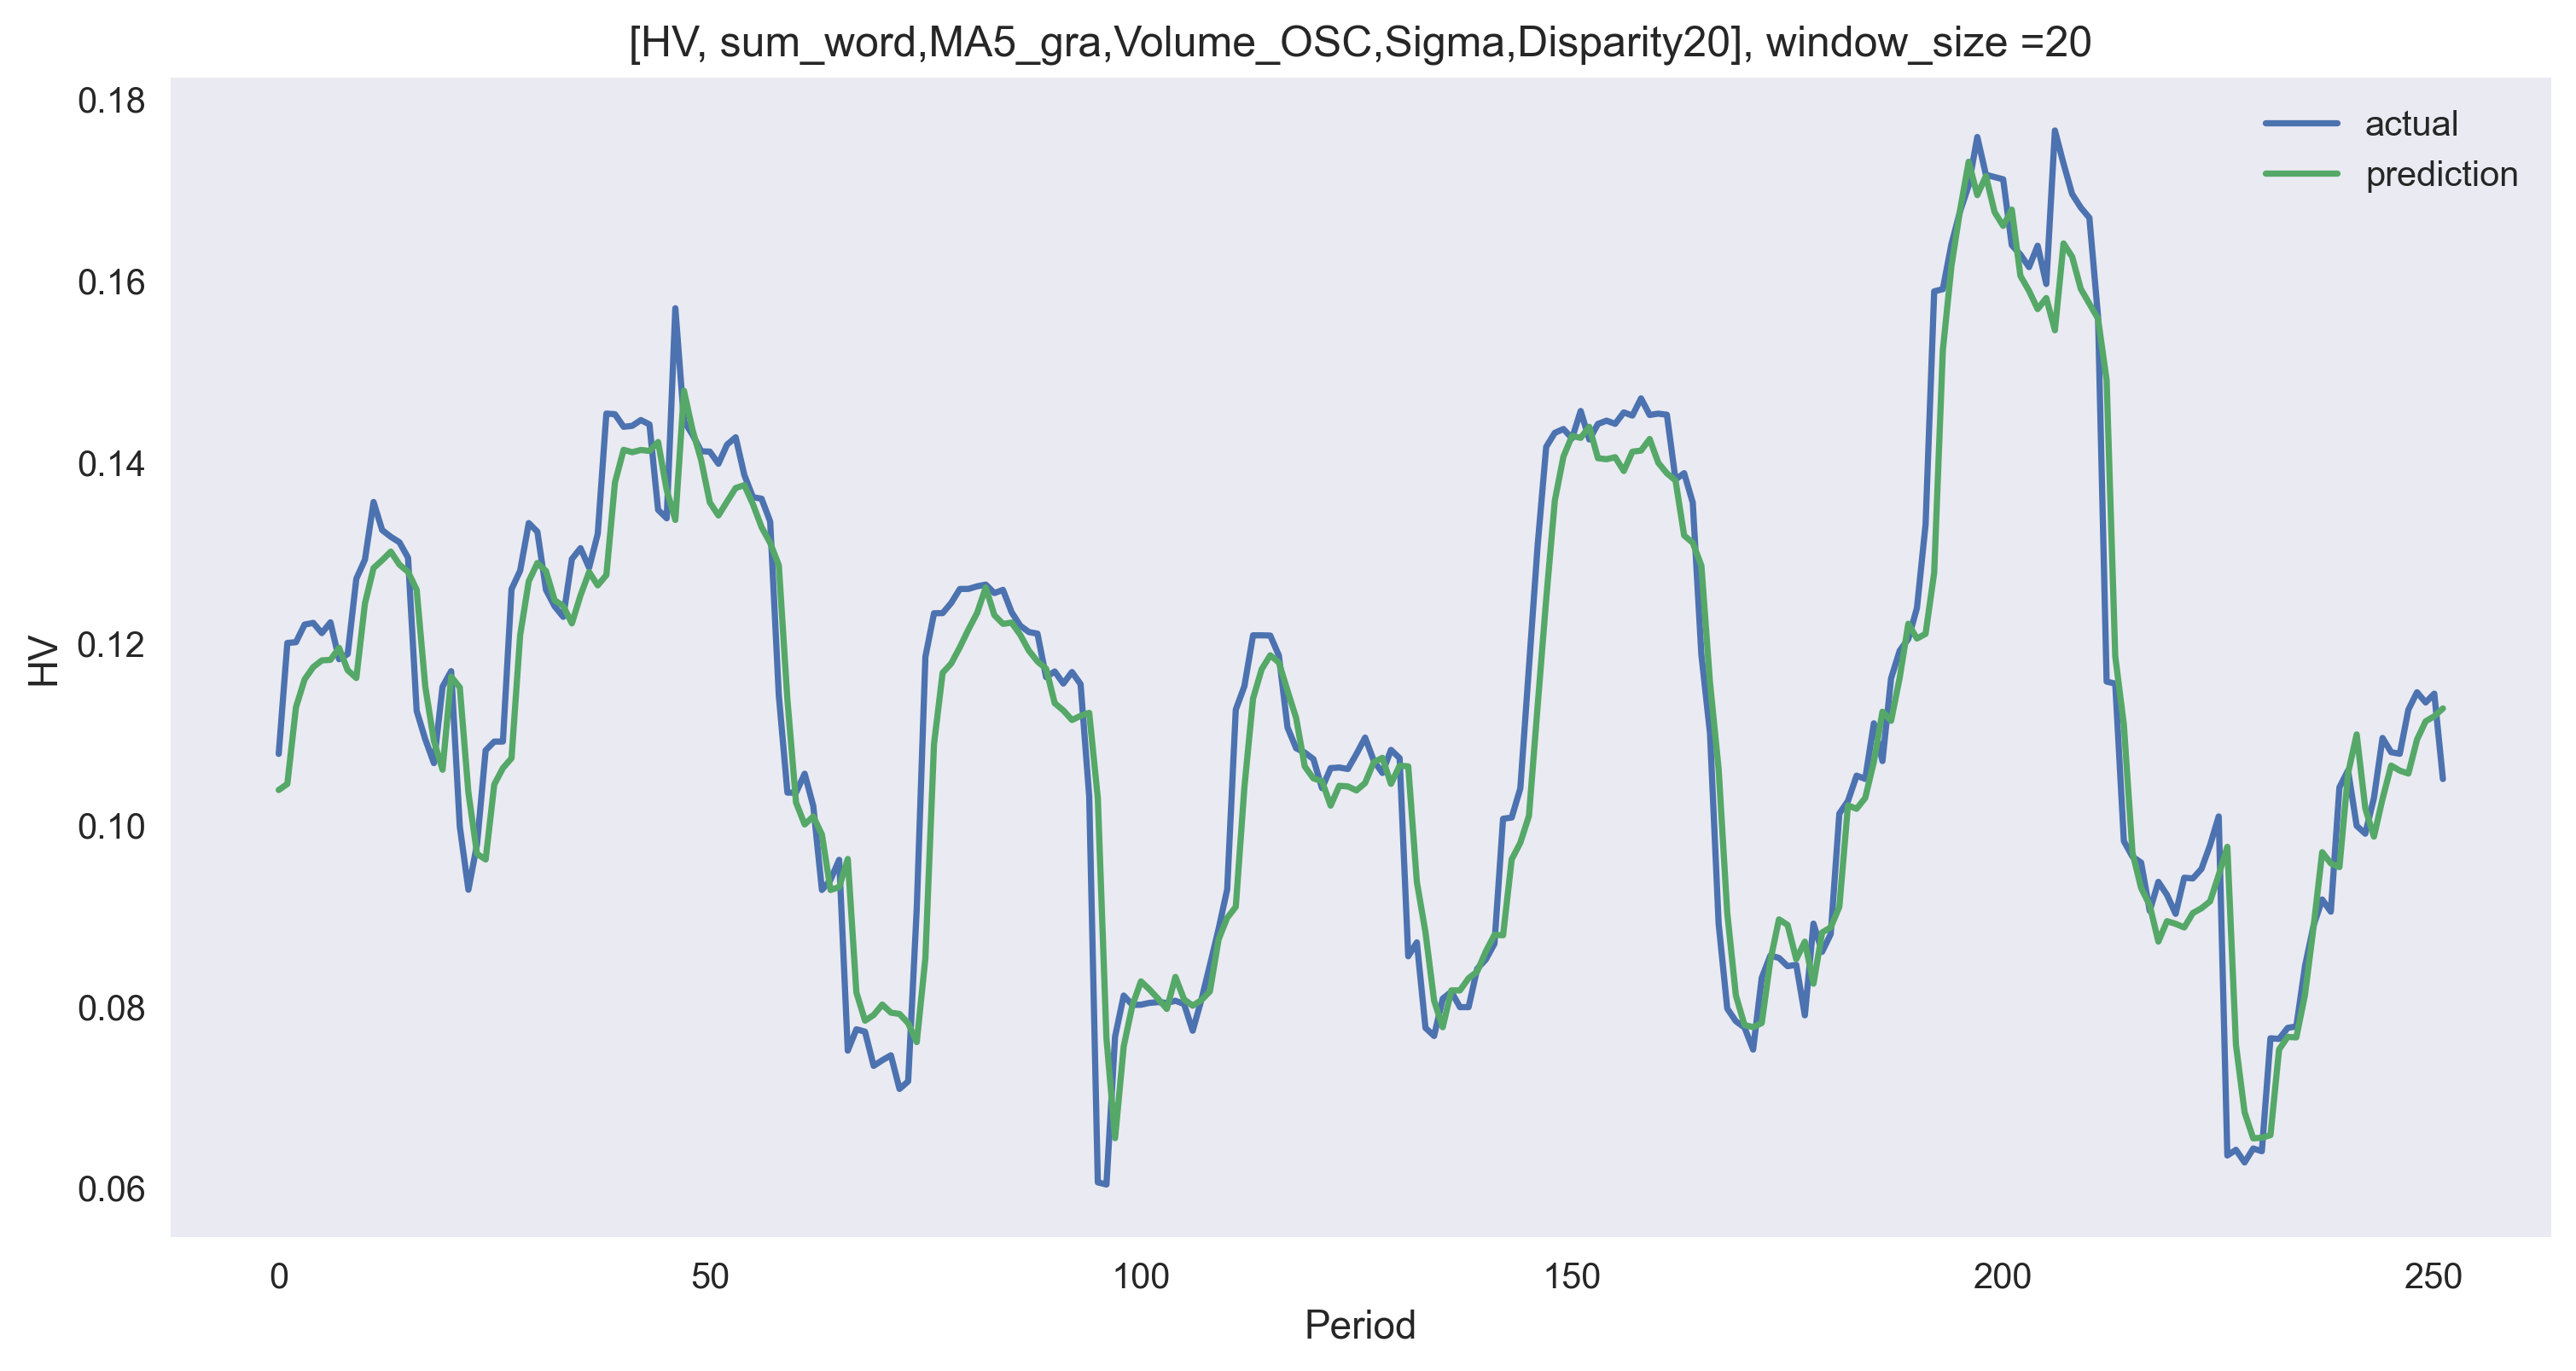

In [ ]:
plt.figure(figsize = (12,6))
plt.title('[HV, sum_word,MA5_gra,Volume_OSC,Sigma,Disparity20], window_size =20')
plt.ylabel('HV')
plt.xlabel('Period')
plt.plot(y_test_1st[-2276:-2024], label = 'actual')
plt.plot(pred[-2276:-2024], label = 'prediction')
plt.grid()
plt.legend(loc = 'best')

plt.show()

In [ ]:
2277+252

2529

In [ ]:
# 2011. 9. 29. ~ 2012. 9. 28.

In [ ]:
pred_2011 = pred[-2529:-2277]
pred_2011[:5]

array([[0.26731634],
       [0.28593957],
       [0.2718538 ],
       [0.2769821 ],
       [0.2873276 ]], dtype=float32)

In [ ]:
len(pred_2011)

219

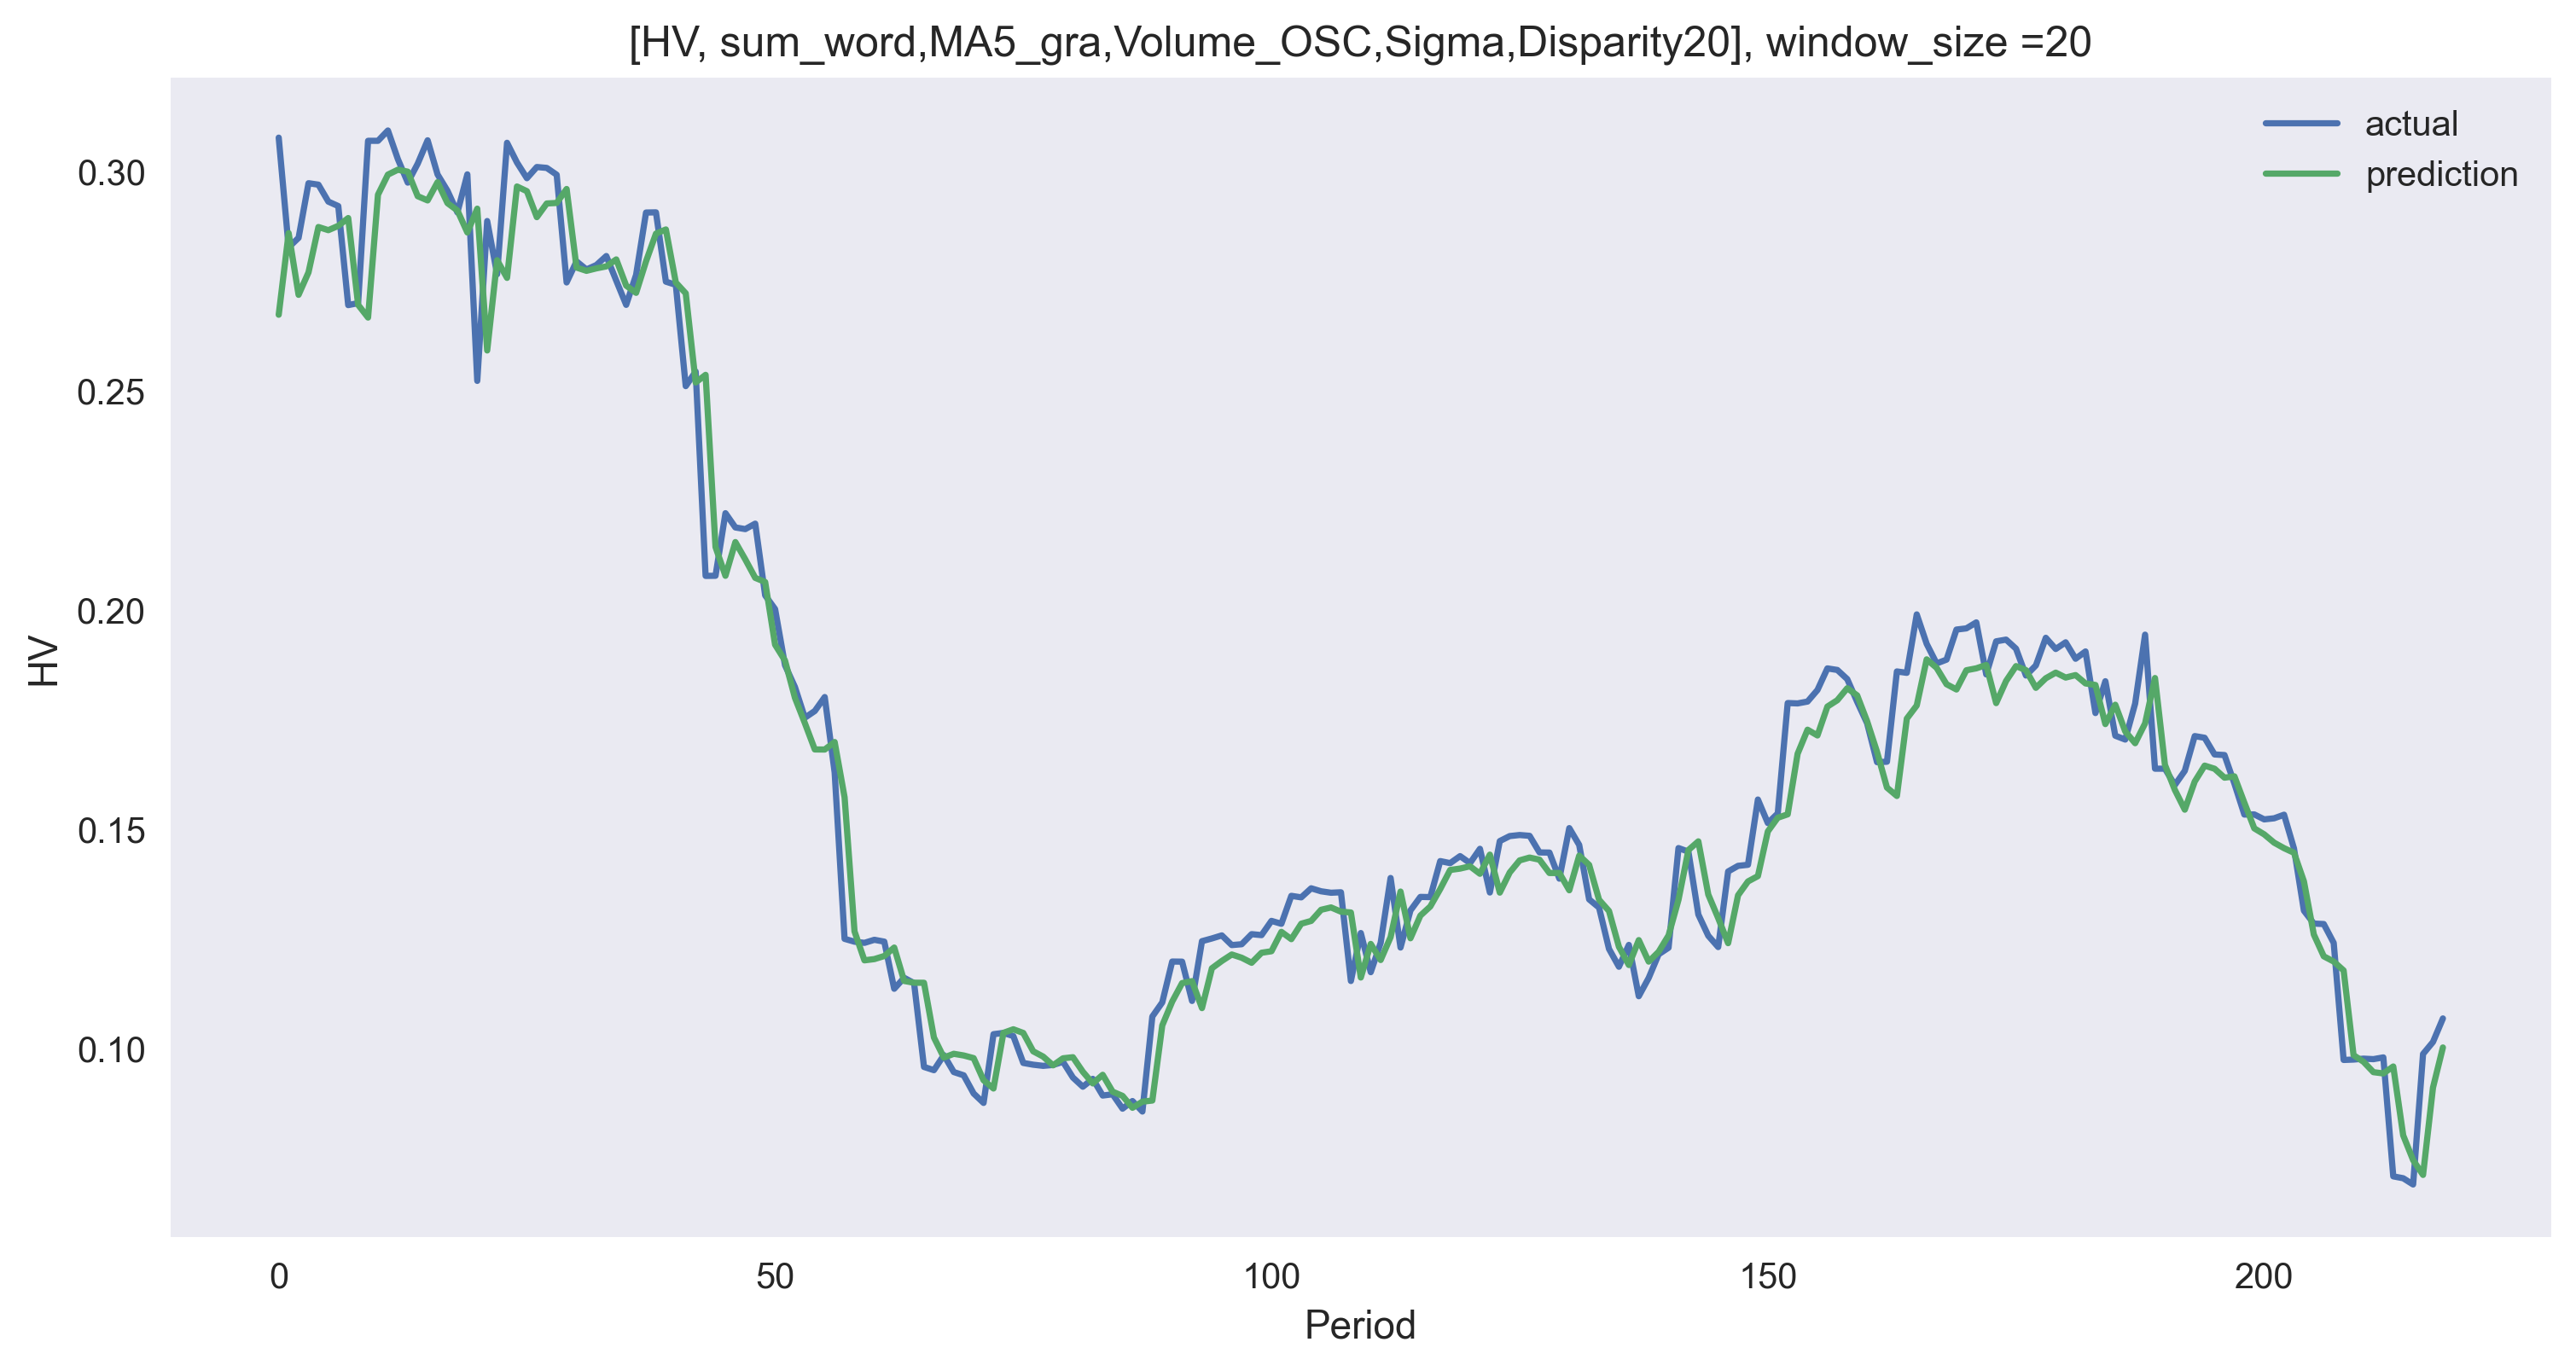

In [ ]:
plt.figure(figsize = (12,6))
plt.title('[HV, sum_word,MA5_gra,Volume_OSC,Sigma,Disparity20], window_size =20')
plt.ylabel('HV')
plt.xlabel('Period')
plt.plot(y_test_1st[-2529:-2277], label = 'actual')
plt.plot(pred[-2529:-2277], label = 'prediction')
plt.grid()
plt.legend(loc = 'best')

plt.show()

# pred 엑셀 파일 만들기

In [ ]:
pred_df = pd.DataFrame(pred)
pred_df.head()

0
0  0.267316
1  0.285940
2  0.271854
3  0.276982
4  0.287328

In [ ]:
pred_df.shape

(2496, 1)

In [ ]:
df.head()

HV  sum_word  MA5_gra  Volume_OSC  Sigma  Disparity20
date                                                              
2003-07-28  NaN       0.0      0.0         0.0    0.0          0.0
2003-07-29  0.0       0.0      0.0         0.0    0.0          0.0
2003-07-30  0.0       0.0      0.0         0.0    0.0          0.0
2003-07-31  0.0       0.0      0.0         0.0    0.0          0.0
2003-08-01  0.0       3.0      0.0         0.0    0.0          0.0

In [ ]:
df_df = df.loc['2011-10-27':'2021-09-28', 'HV':'HV']
df_df

HV
date                
2011-10-27  0.329507
2011-10-28  0.302711
2011-10-31  0.305027
2011-11-01  0.318380
2011-11-02  0.318021
...              ...
2021-09-22  0.113992
2021-09-23  0.125323
2021-09-24  0.123650
2021-09-27  0.117492
2021-09-28  0.139082

[2496 rows x 1 columns]

In [ ]:
df_df['pred'] = pred
df_df

HV      pred
date                          
2011-10-27  0.329507  0.267316
2011-10-28  0.302711  0.285940
2011-10-31  0.305027  0.271854
2011-11-01  0.318380  0.276982
2011-11-02  0.318021  0.287328
...              ...       ...
2021-09-22  0.113992  0.121327
2021-09-23  0.125323  0.118876
2021-09-24  0.123650  0.129592
2021-09-27  0.117492  0.124519
2021-09-28  0.139082  0.118895

[2496 rows x 2 columns]

In [ ]:
df_df.drop('HV', axis =1, inplace =True)

In [ ]:
df_df

pred
date                
2011-10-27  0.267316
2011-10-28  0.285940
2011-10-31  0.271854
2011-11-01  0.276982
2011-11-02  0.287328
...              ...
2021-09-22  0.121327
2021-09-23  0.118876
2021-09-24  0.129592
2021-09-27  0.124519
2021-09-28  0.118895

[2496 rows x 1 columns]

In [ ]:
df_df.to_csv('pred_df.csv')